<h3>Generation of SALCs in Octahedral and Tetrahedral Coordination Environments</h3>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display_latex, display_html

<h5>Local Imports</h5>

In [3]:
from transformations import *

Octahedral Symmetry Group, $O_h$

The operations which compose the octahedral point group, $O_h$, of an octahedron with vertices at integer positions nearest to the origin as follows

$$(1, 0, 0), (-1, 0, 0), (0, 1, 0), (0, -1, 0), (0, 0, 1), (0, 0, -1)$$

Will be stored in a dictionary for later use.

In [4]:
### Vertices of the Octahedron ###

octahedral_vertices = np.array([[1,  0, -1,  0,  0,  0],
                                [0,  1,  0, -1,  0,  0],
                                [0,  0,  0,  0,  1, -1]], dtype=np.float64)




### The group symmetry elements as a list of the conjugacy classes of the group ###

#Identity
E = [np.eye(3)]

#180° rotation about the pricipal axes
C_2_4 = [rotation([ 1, 0, 0], np.pi),
         rotation([ 0, 1, 0], np.pi), 
         rotation([ 0, 0, 1], np.pi)]

#90° rotations about the principal axes
C_1_4 = [rotation([ 1, 0, 0], np.pi/2), 
         rotation([ 0, 1, 0], np.pi/2), 
         rotation([ 0, 0, 1], np.pi/2), 
         rotation([ 1, 0, 0],-np.pi/2), 
         rotation([ 0, 1, 0],-np.pi/2), 
         rotation([ 0, 0, 1],-np.pi/2)]

#180° rotation about the bisectors of the edges
C_2_prime = [rotation([ 1, 1, 0], np.pi), 
             rotation([-1, 1, 0], np.pi), 
             rotation([ 1, 0, 1], np.pi), 
             rotation([ 0, 1, 1], np.pi), 
             rotation([-1, 0, 1], np.pi), 
             rotation([ 0,-1, 1], np.pi)]

#120° rotation about the triangular face normal
C_1_3 = [rotation([ 1, 1, 1], 2*np.pi/3), 
         rotation([-1, 1, 1], 2*np.pi/3), 
         rotation([-1,-1, 1], 2*np.pi/3), 
         rotation([ 1,-1, 1], 2*np.pi/3), 
         rotation([ 1, 1, 1],-2*np.pi/3), 
         rotation([-1, 1, 1],-2*np.pi/3), 
         rotation([-1,-1, 1],-2*np.pi/3), 
         rotation([ 1,-1, 1],-2*np.pi/3)]

#Inversion
i = [-np.eye(3)]

#Inversion, then 180° rotation about the pricipal axes
iC_2_4 = [-np.eye(3) @ element for element in C_2_4]

#Inversion, then 90° rotations about the principal axes
iC_1_4 = [-np.eye(3) @ element for element in C_1_4]

#Inversion, 180° rotation about the bisectors of the edges
iC_2_prime = [-np.eye(3) @ element for element in C_2_prime]

#Inversion, 120° rotation about the triangular face normal
iC_1_3 = [-np.eye(3) @ element for element in C_1_3]

oct_classes = [E, C_2_4, C_1_4, C_2_prime, C_1_3, i, iC_2_4, iC_1_4, iC_2_prime, iC_1_3]
oct_class_size = [len(cls) for cls in oct_classes]
oct_order = sum(oct_class_size)




### Octahedral Character Table (Dresselhaus Table A.31)###

oct_char_table = {
    "A_plus_1"  : np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
    "A_plus_2"  : np.array([1, 1,-1,-1, 1, 1, 1,-1,-1, 1]),
    "E_plus"    : np.array([2, 2, 0, 0,-1, 2, 2, 0, 0,-1]),
    "T_minus_1" : np.array([3,-1, 1,-1, 0,-3, 1,-1, 1, 0]),
    "T_minus_2" : np.array([3,-1,-1, 1, 0,-3, 1, 1,-1, 0]),
    "A_minus_1" : np.array([1, 1, 1, 1, 1,-1,-1,-1,-1,-1]),
    "A_minus_2" : np.array([1, 1,-1,-1, 1,-1,-1, 1, 1,-1]),
    "E_minus"   : np.array([2, 2, 0, 0,-1,-2,-2, 0, 0, 1]),
    "T_plus_1"  : np.array([3,-1, 1,-1, 0, 3,-1, 1,-1, 0]),
    "T_plus_2"  : np.array([3,-1,-1, 1, 0, 3,-1,-1, 1, 0]),
}

#dimensionality of the IRs
oct_l = [1,1,2,3,3,1,1,2,3,3]


Tetrahedral Symmetry Group, $T_d$

The operations which compose the tetrahedral point group, $T_d$, of a tetrahedron with the following vertices

$$(1, 0, -\frac{\sqrt{2}}{2}), (-1, 0, -\frac{\sqrt{2}}{2}), (0, 1, \frac{\sqrt{2}}{2}), (0, -1, \frac{\sqrt{2}}{2})$$


In [5]:
### Vertices of the Tetrahedron ###

tetrahedral_vertices = np.array([[            1,           -1,            0,            0],
                                 [            0,            0,            1,           -1],
                                 [-np.sqrt(2)/2,-np.sqrt(2)/2, np.sqrt(2)/2, np.sqrt(2)/2]], dtype=np.float64)




### The group symmetry elements as a list of the conjugacy classes of the group ###

#Identity
E = [np.eye(3)]

#120° rotations about the vertices
C_1_3 = [rotation([ 1, 0, -np.sqrt(2)/2], 2*np.pi/3),
         rotation([-1, 0, -np.sqrt(2)/2], 2*np.pi/3),
         rotation([ 0, 1,  np.sqrt(2)/2], 2*np.pi/3),
         rotation([ 0,-1,  np.sqrt(2)/2], 2*np.pi/3),
         rotation([ 1, 0, -np.sqrt(2)/2], 4*np.pi/3),
         rotation([-1, 0, -np.sqrt(2)/2], 4*np.pi/3),
         rotation([ 0, 1,  np.sqrt(2)/2], 4*np.pi/3),
         rotation([ 0,-1,  np.sqrt(2)/2], 4*np.pi/3)]

#180° rotation about the edge bisectors
C_1_2 = [rotation([ 0, 0, 1], np.pi),
         rotation([ 1, 1, 0], np.pi),
         rotation([-1, 1, 0], np.pi)]

#mirror reflections
sigma_d = [reflection([ 0, 1, 0]),
           reflection([ np.sqrt(2),-np.sqrt(2), 2]),
           reflection([ np.sqrt(2), np.sqrt(2), 2]),
           reflection([ np.sqrt(2), np.sqrt(2),-2]),
           reflection([-np.sqrt(2), np.sqrt(2), 2]),
           reflection([ 1, 0, 0])]

#90° roto-reflection about the edge bisectors
S_1_4 = [rotation([ 0, 0, 1], np.pi/2)@reflection([ 0, 0, 1]),
         rotation([ 1, 1, 0], np.pi/2)@reflection([ 1, 1, 0]),
         rotation([-1, 1, 0], np.pi/2)@reflection([-1, 1, 0]),
         rotation([ 0, 0, 1], 3*np.pi/2)@reflection([ 0, 0, 1]),
         rotation([ 1, 1, 0], 3*np.pi/2)@reflection([ 1, 1, 0]),
         rotation([-1, 1, 0], 3*np.pi/2)@reflection([-1, 1, 0])]

tet_classes = [E, C_1_3, C_1_2, sigma_d, S_1_4]
tet_class_size = [len(cls) for cls in tet_classes]
tet_order = sum(tet_class_size)




### Tetrahedral Character Table (Dresselhaus Table A.32)###

tet_char_table = {
    "A_1" : np.array([1, 1, 1, 1, 1]),
    "A_2" : np.array([1, 1, 1,-1,-1]),
    "E"   : np.array([2,-1, 2, 0, 0]),
    "T_1" : np.array([3, 0,-1,-1, 1]),
    "T_2" : np.array([3, 0,-1, 1,-1]),
}

#dimensionality of the IRs
tet_l  = [1,1,2,3,3]

<h3>S-orbital Representations</h3>

Since S-orbitals have spherical symmetry they can be modeled as points. The S-orbitals at each of the vertices can therefore be represented as vectors which point to the vertex on which the S-orbital is located.

In [77]:
def point_representation(element : np.ndarray, vertices : np.ndarray) -> np.ndarray:
    """generate a list of representations of the group elements based on their action of the vertices, return as list of permuation matrices"""
    transformed_vertices = element @ vertices
    return permutation_matrix(vertices, transformed_vertices)




def point_proj_operator(IR_key: str, class_list: list, char_table: dict, IR_dim: list, vertices) -> np.ndarray:
    """generate the projection operator for functions with spherical symmetry"""
    _, basis_dim = vertices.shape
    proj_operator = np.zeros((basis_dim,basis_dim), dtype=np.float64)
    h = sum([len(cls) for cls in class_list])
    for i, cls in enumerate(class_list):
        for element in cls:
            proj_operator += char_table[IR_key][i] * point_representation(element, vertices)
    for i, key in enumerate(char_table.keys()):
        if key == IR_key:
            n = i
    proj_operator *= (IR_dim[n]/h)
    return proj_operator




def s_orbital_plot(salcs: list, vertices: np.ndarray):
    """plot the s-orbital SALC in the octahedral coordination environment"""
    
    #print SALCs in table
    table = dict()
    basis = np.vstack(salcs)
    n = len(salcs)
    m = vertices.shape[1]
    indices = ["SALC {}".format(i+1) for i in range(n)]
    table = {"S{}".format(i+1) : np.around(basis[:,i],3) for i in range(m)}
    display(pd.DataFrame(table, index=indices))
    
    #iterate over each SALC
    scale_factor = 0.3
    fig, ax = plt.subplots(1,n, figsize=(8,8*n), dpi=300, squeeze=False, subplot_kw={'projection': '3d'})
    for i, salc in enumerate(salcs):

        #draw the edges of the polyhedron
        d_matrix = np.zeros((m,m), dtype=np.float64)
        for k in range(m):
            for l in range(k+1,m):
                diff = vertices[:,k] - vertices[:,l]
                d_matrix[k,l] = np.sqrt(np.dot(diff, diff))
        d_matrix = np.around(d_matrix,3)
        min_dist = np.sort(np.unique(d_matrix))[1]
        connected = (d_matrix == min_dist)
        for k in range(m):
            for l in range(k+1,m):
                if connected[k,l]:
                    ax[0,i].plot([vertices[0,k],vertices[0,l]],
                                 [vertices[1,k],vertices[1,l]],
                                 [vertices[2,k],vertices[2,l]], 
                                 color="black")
        #draw orbitals
        for j in range(m):
            salc = np.around(salc,3)
            u, v = np.mgrid[0:2*np.pi:100j, 0:np.pi:100j]
            x = scale_factor*np.abs(salc[j])*np.cos(u)*np.sin(v)+vertices[0,j]
            y = scale_factor*np.abs(salc[j])*np.sin(u)*np.sin(v)+vertices[1,j]
            z = scale_factor*np.abs(salc[j])*np.cos(v)+vertices[2,j]
            s = np.sign(salc[j])
            if s == 1:
                ax[0,i].plot_surface(x, y, z, color="white", alpha=0.8)        
            elif s == -1:
                ax[0,i].plot_surface(x, y, z, color="black", alpha=0.8)        
            
        ax[0,i].set_xlim3d(-1.5, 1.5)
        ax[0,i].set_ylim3d(-1.5, 1.5)
        ax[0,i].set_zlim3d(-1.5, 1.5)
        ax[0,i].xaxis.set_major_formatter(plt.NullFormatter())
        ax[0,i].yaxis.set_major_formatter(plt.NullFormatter())
        ax[0,i].zaxis.set_major_formatter(plt.NullFormatter())
   
    plt.show()
    plt.close()

I've provided plots to accompany the SALCs generated by the projection operator method. These plots require a somewhat subtle interpretation. They shouldn't necessarily be interpreted as resembling the real wavefunctions at the defect site. They do in many cases. However, some of the SALCs will be downright unphysical. In particular notice that the SALC with $A^{+}_1$ symmetry in the octahedral coordination environment features lobes at each of the vertices of the octahedron. Since, this SALC is taken to represent the ground state wavefunction in a potential with cubic symmetry we should expect the real wavefunction to feature a single lobe located at the center of the octahedron. However, such a wavefunction would be impossible to generate given the finite basis set this analysis utilized, namely, 1 s-orbital located on each of the 6 vertices. Clearly no linear combination of these basis vectors could possibly produce a wavefunction which is centered in the middle of the octahedron. The SALC that is generated is however guaranteed to transform under the action of the of the symmetry operators of the coordination environment point group in the same way as the real wavefunction it represents. This importantly ensures that the SALC basis set has the same degeneracy of the actual electronic states at the defect site. Despite potentially being unphysical, a semi-empirical energy model can still be built to fit the SALC energies with the DFT data by considering the interaction energies between the different atomic orbitals.

<h5>Octahedral S-orbital SALCs</h5>

In [7]:
#calculate the degeneracy of the SALCs in each irreducible group
for IR_key, IR_chars in oct_char_table.items():

    rep_chars = []
    for cls in oct_classes:
        rep = point_representation(cls[0], octahedral_vertices)
        rep_chars.append(np.trace(rep))

    rep_chars = np.array(rep_chars)
    row = np.multiply(oct_class_size, IR_chars)
    num = int((1/oct_order)*np.dot(row, rep_chars))
    print("{n} SALC(s) have {sym} symmetry".format(n=num, sym=IR_key))

1 SALC(s) have A_plus_1 symmetry
0 SALC(s) have A_plus_2 symmetry
1 SALC(s) have E_plus symmetry
1 SALC(s) have T_minus_1 symmetry
0 SALC(s) have T_minus_2 symmetry
0 SALC(s) have A_minus_1 symmetry
0 SALC(s) have A_minus_2 symmetry
0 SALC(s) have E_minus symmetry
0 SALC(s) have T_plus_1 symmetry
0 SALC(s) have T_plus_2 symmetry


Octahedral S-orbital SALCs with $A_{1}^{+}$ symmetry 

S1     S2     S3     S4     S5     S6
SALC 1  0.408  0.408  0.408  0.408  0.408  0.408

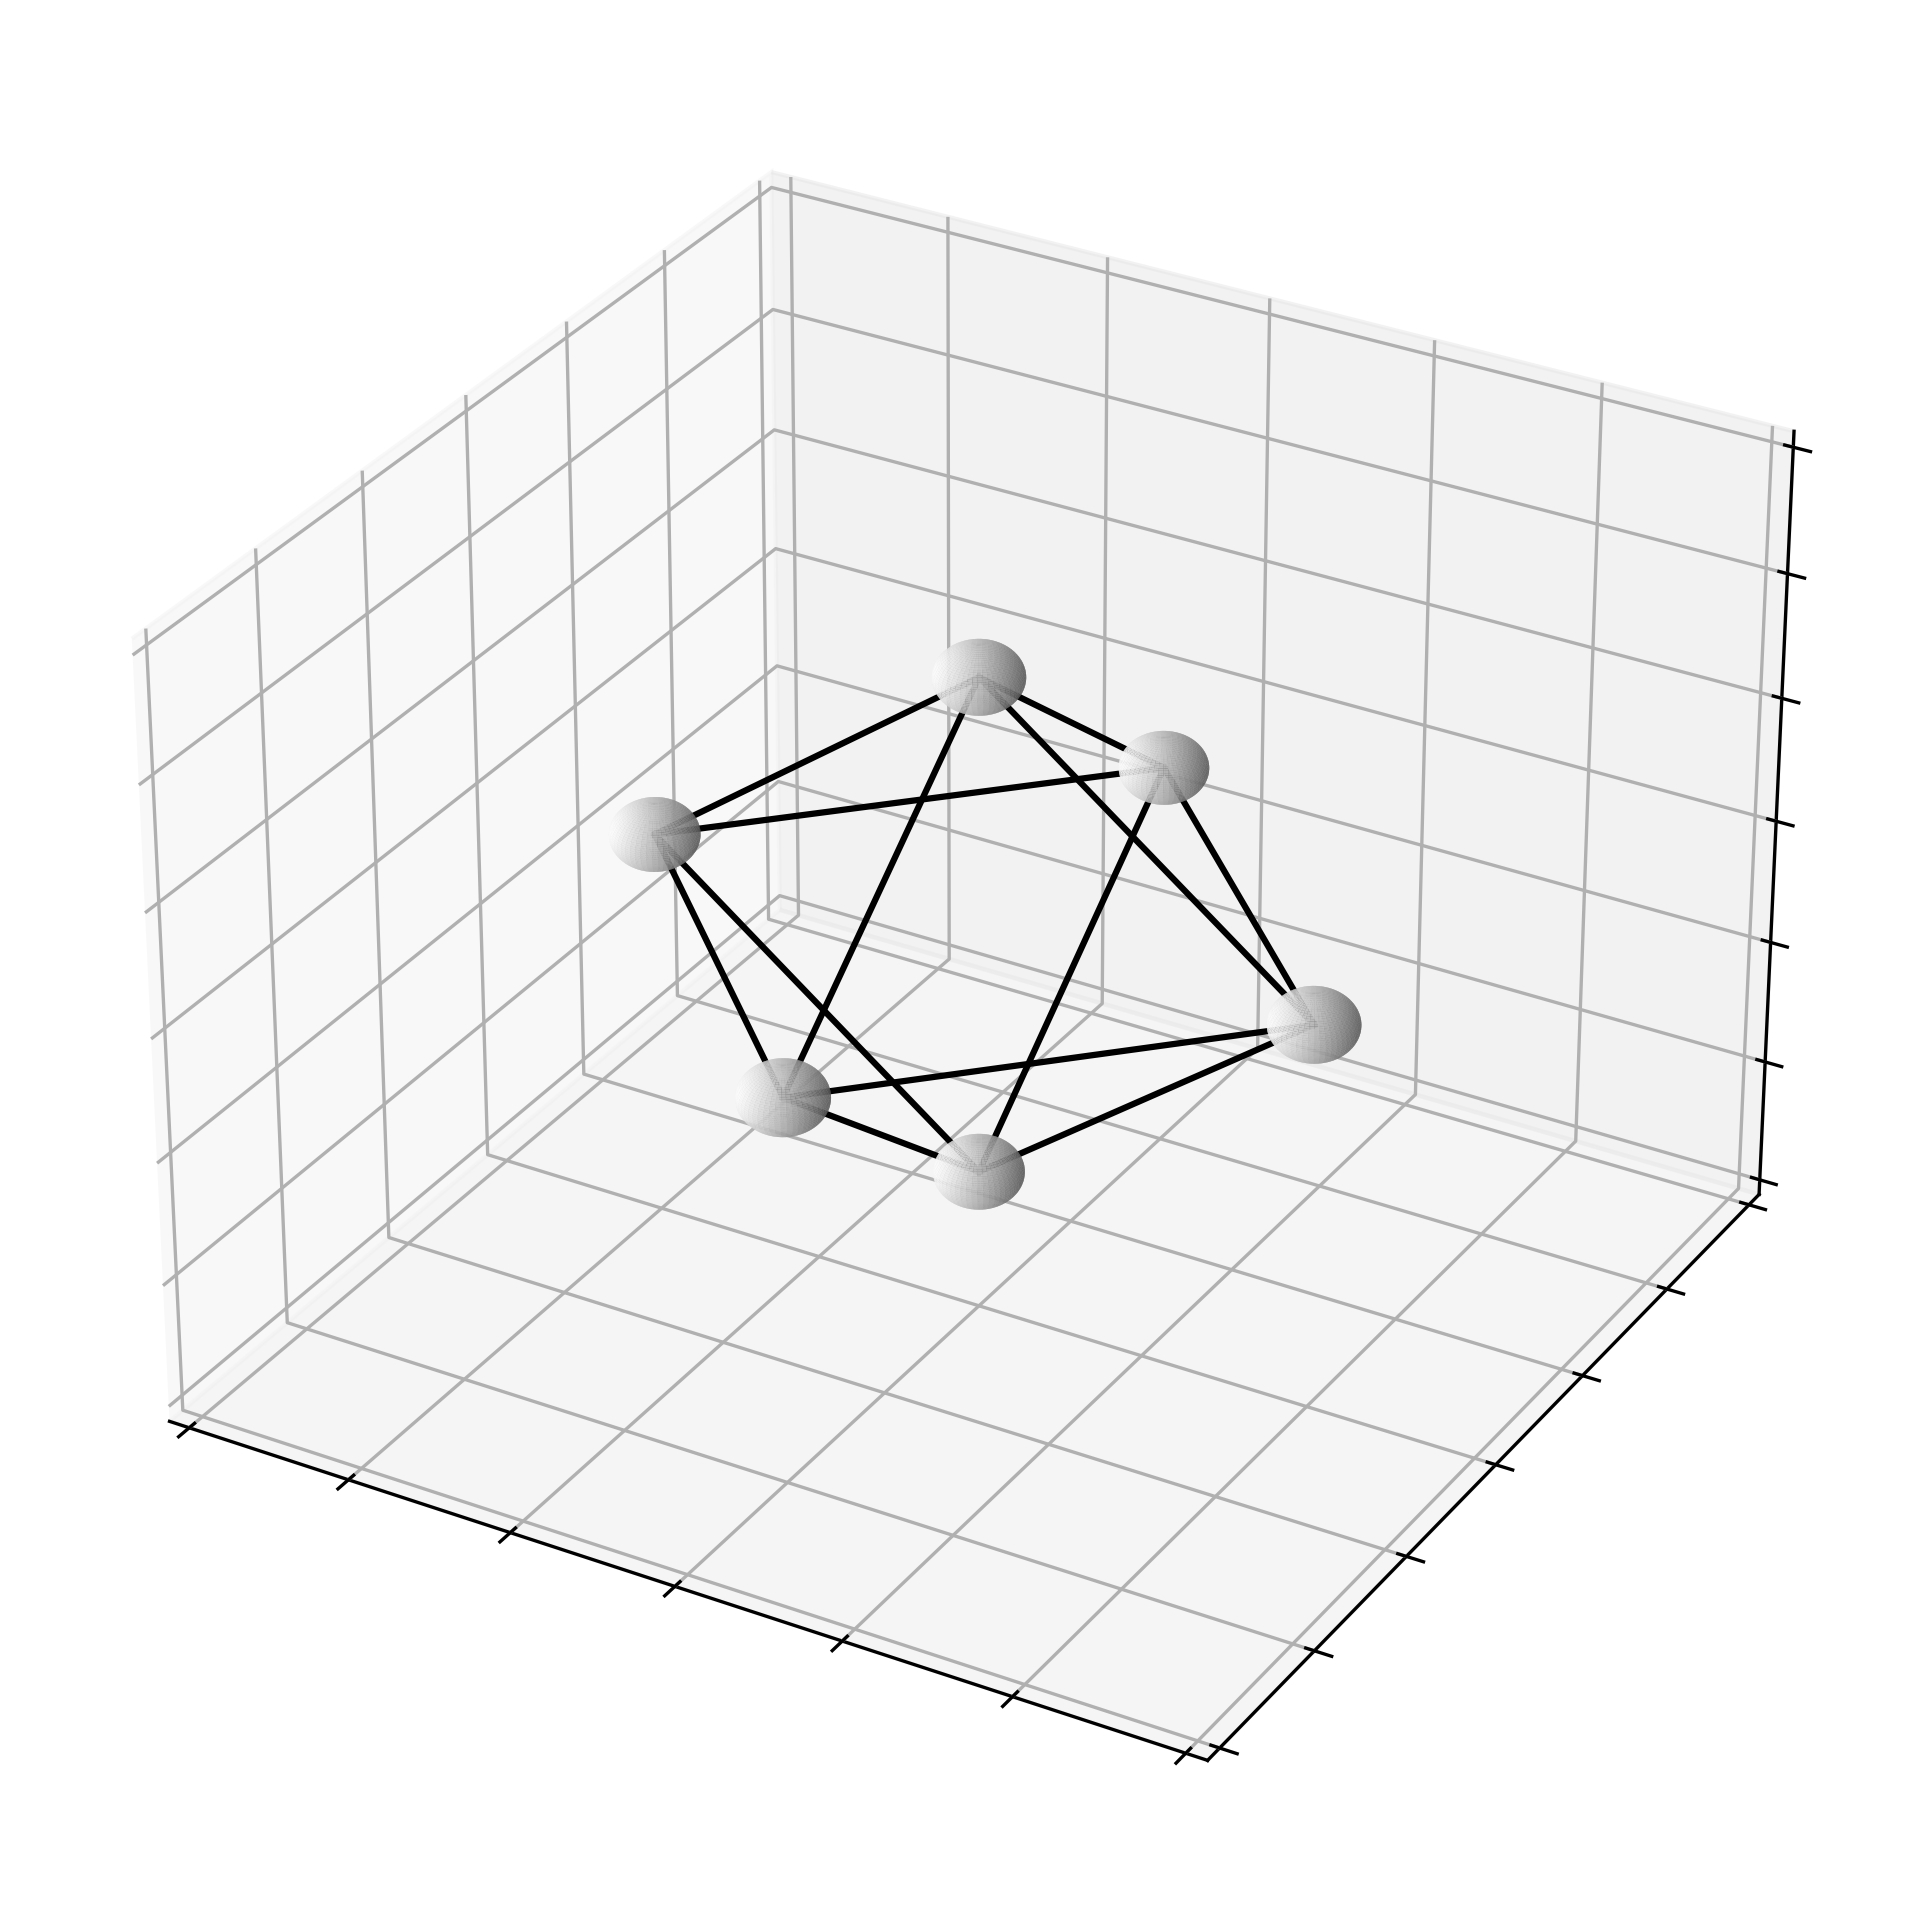

In [8]:
proj_operator = point_proj_operator("A_plus_1", oct_classes, oct_char_table, oct_l, octahedral_vertices)
proj_basis = proj_operator @ np.eye(6)
orthonormal_basis = gram_schmidt(np.hsplit(proj_basis, 6))
s_orbital_plot(orthonormal_basis, octahedral_vertices)

Octahedral S-orbital SALCs with $E^{+}$ symmetry 

S1     S2     S3     S4     S5     S6
SALC 1  0.577 -0.289  0.577 -0.289 -0.289 -0.289
SALC 2  0.000  0.500  0.000  0.500 -0.500 -0.500

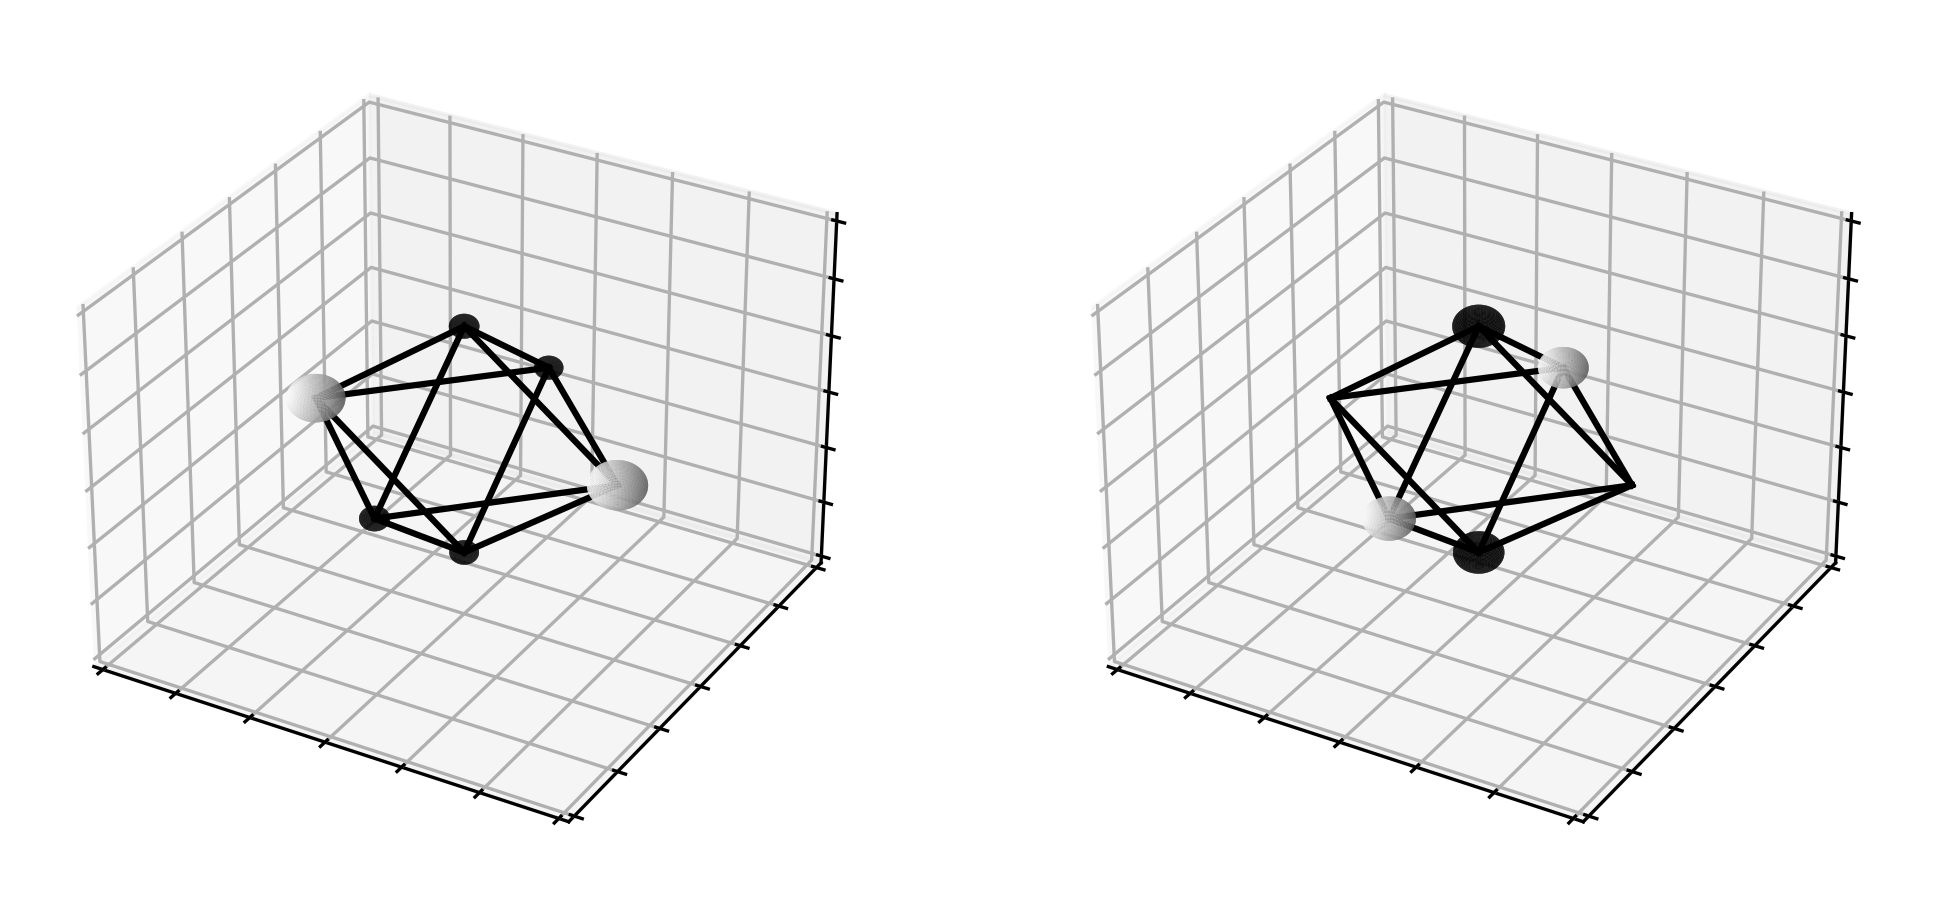

In [9]:
proj_operator = point_proj_operator("E_plus", oct_classes, oct_char_table, oct_l, octahedral_vertices)
proj_basis = proj_operator @ np.eye(6)
orthonormal_basis = gram_schmidt(np.hsplit(proj_basis, 6))
s_orbital_plot(orthonormal_basis, octahedral_vertices)

Octahedral S-orbital SALCs with $T_{1}^{-}$ symmetry 

S1     S2     S3     S4     S5     S6
SALC 1  0.707  0.000 -0.707  0.000  0.000  0.000
SALC 2  0.000  0.707  0.000 -0.707  0.000  0.000
SALC 3  0.000  0.000  0.000  0.000  0.707 -0.707

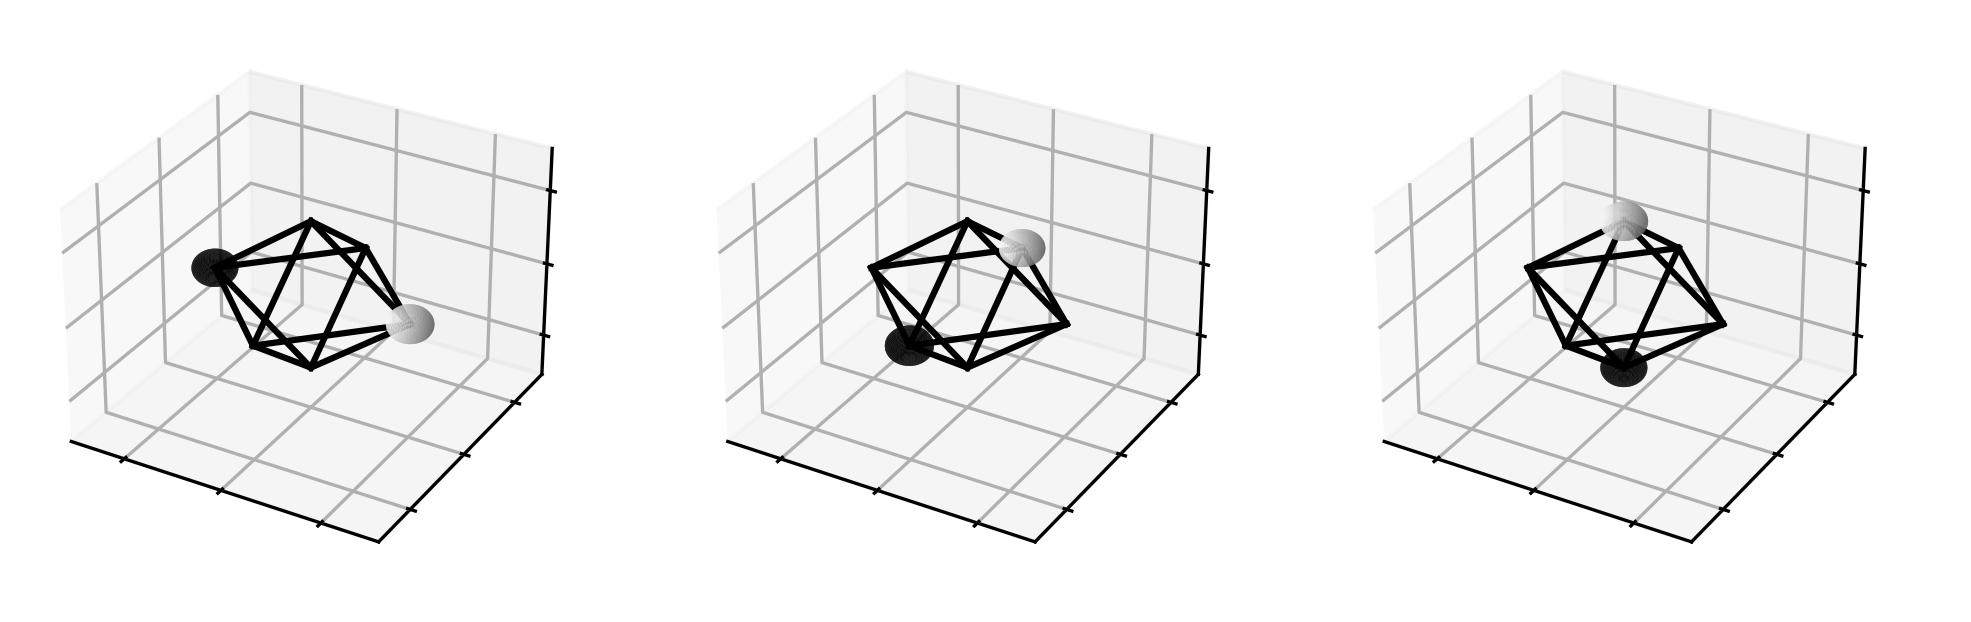

In [10]:
proj_operator = point_proj_operator("T_minus_1", oct_classes, oct_char_table, oct_l, octahedral_vertices)
proj_basis = proj_operator @ np.eye(6)
orthonormal_basis = gram_schmidt(np.hsplit(proj_basis, 6))
s_orbital_plot(orthonormal_basis, octahedral_vertices)

<h5>Tetrahedral S-orbital SALCs</h5>

In [11]:
#calculate the degeneracy of the SALCs in each irreducible group
for IR_key, IR_chars in tet_char_table.items():

    rep_chars = []
    for cls in tet_classes:
        rep = point_representation(cls[0], tetrahedral_vertices)
        rep_chars.append(np.trace(rep))

    rep_chars = np.array(rep_chars)
    row = np.multiply(tet_class_size, IR_chars)
    num = int((1/tet_order)*np.dot(row, rep_chars))
    print("{n} SALC(s) have {sym} symmetry".format(n=num, sym=IR_key))

1 SALC(s) have A_1 symmetry
0 SALC(s) have A_2 symmetry
0 SALC(s) have E symmetry
0 SALC(s) have T_1 symmetry
1 SALC(s) have T_2 symmetry


Tetrahedral S-orbital SALCs with $A_1$ symmetry 

S1   S2   S3   S4
SALC 1  0.5  0.5  0.5  0.5

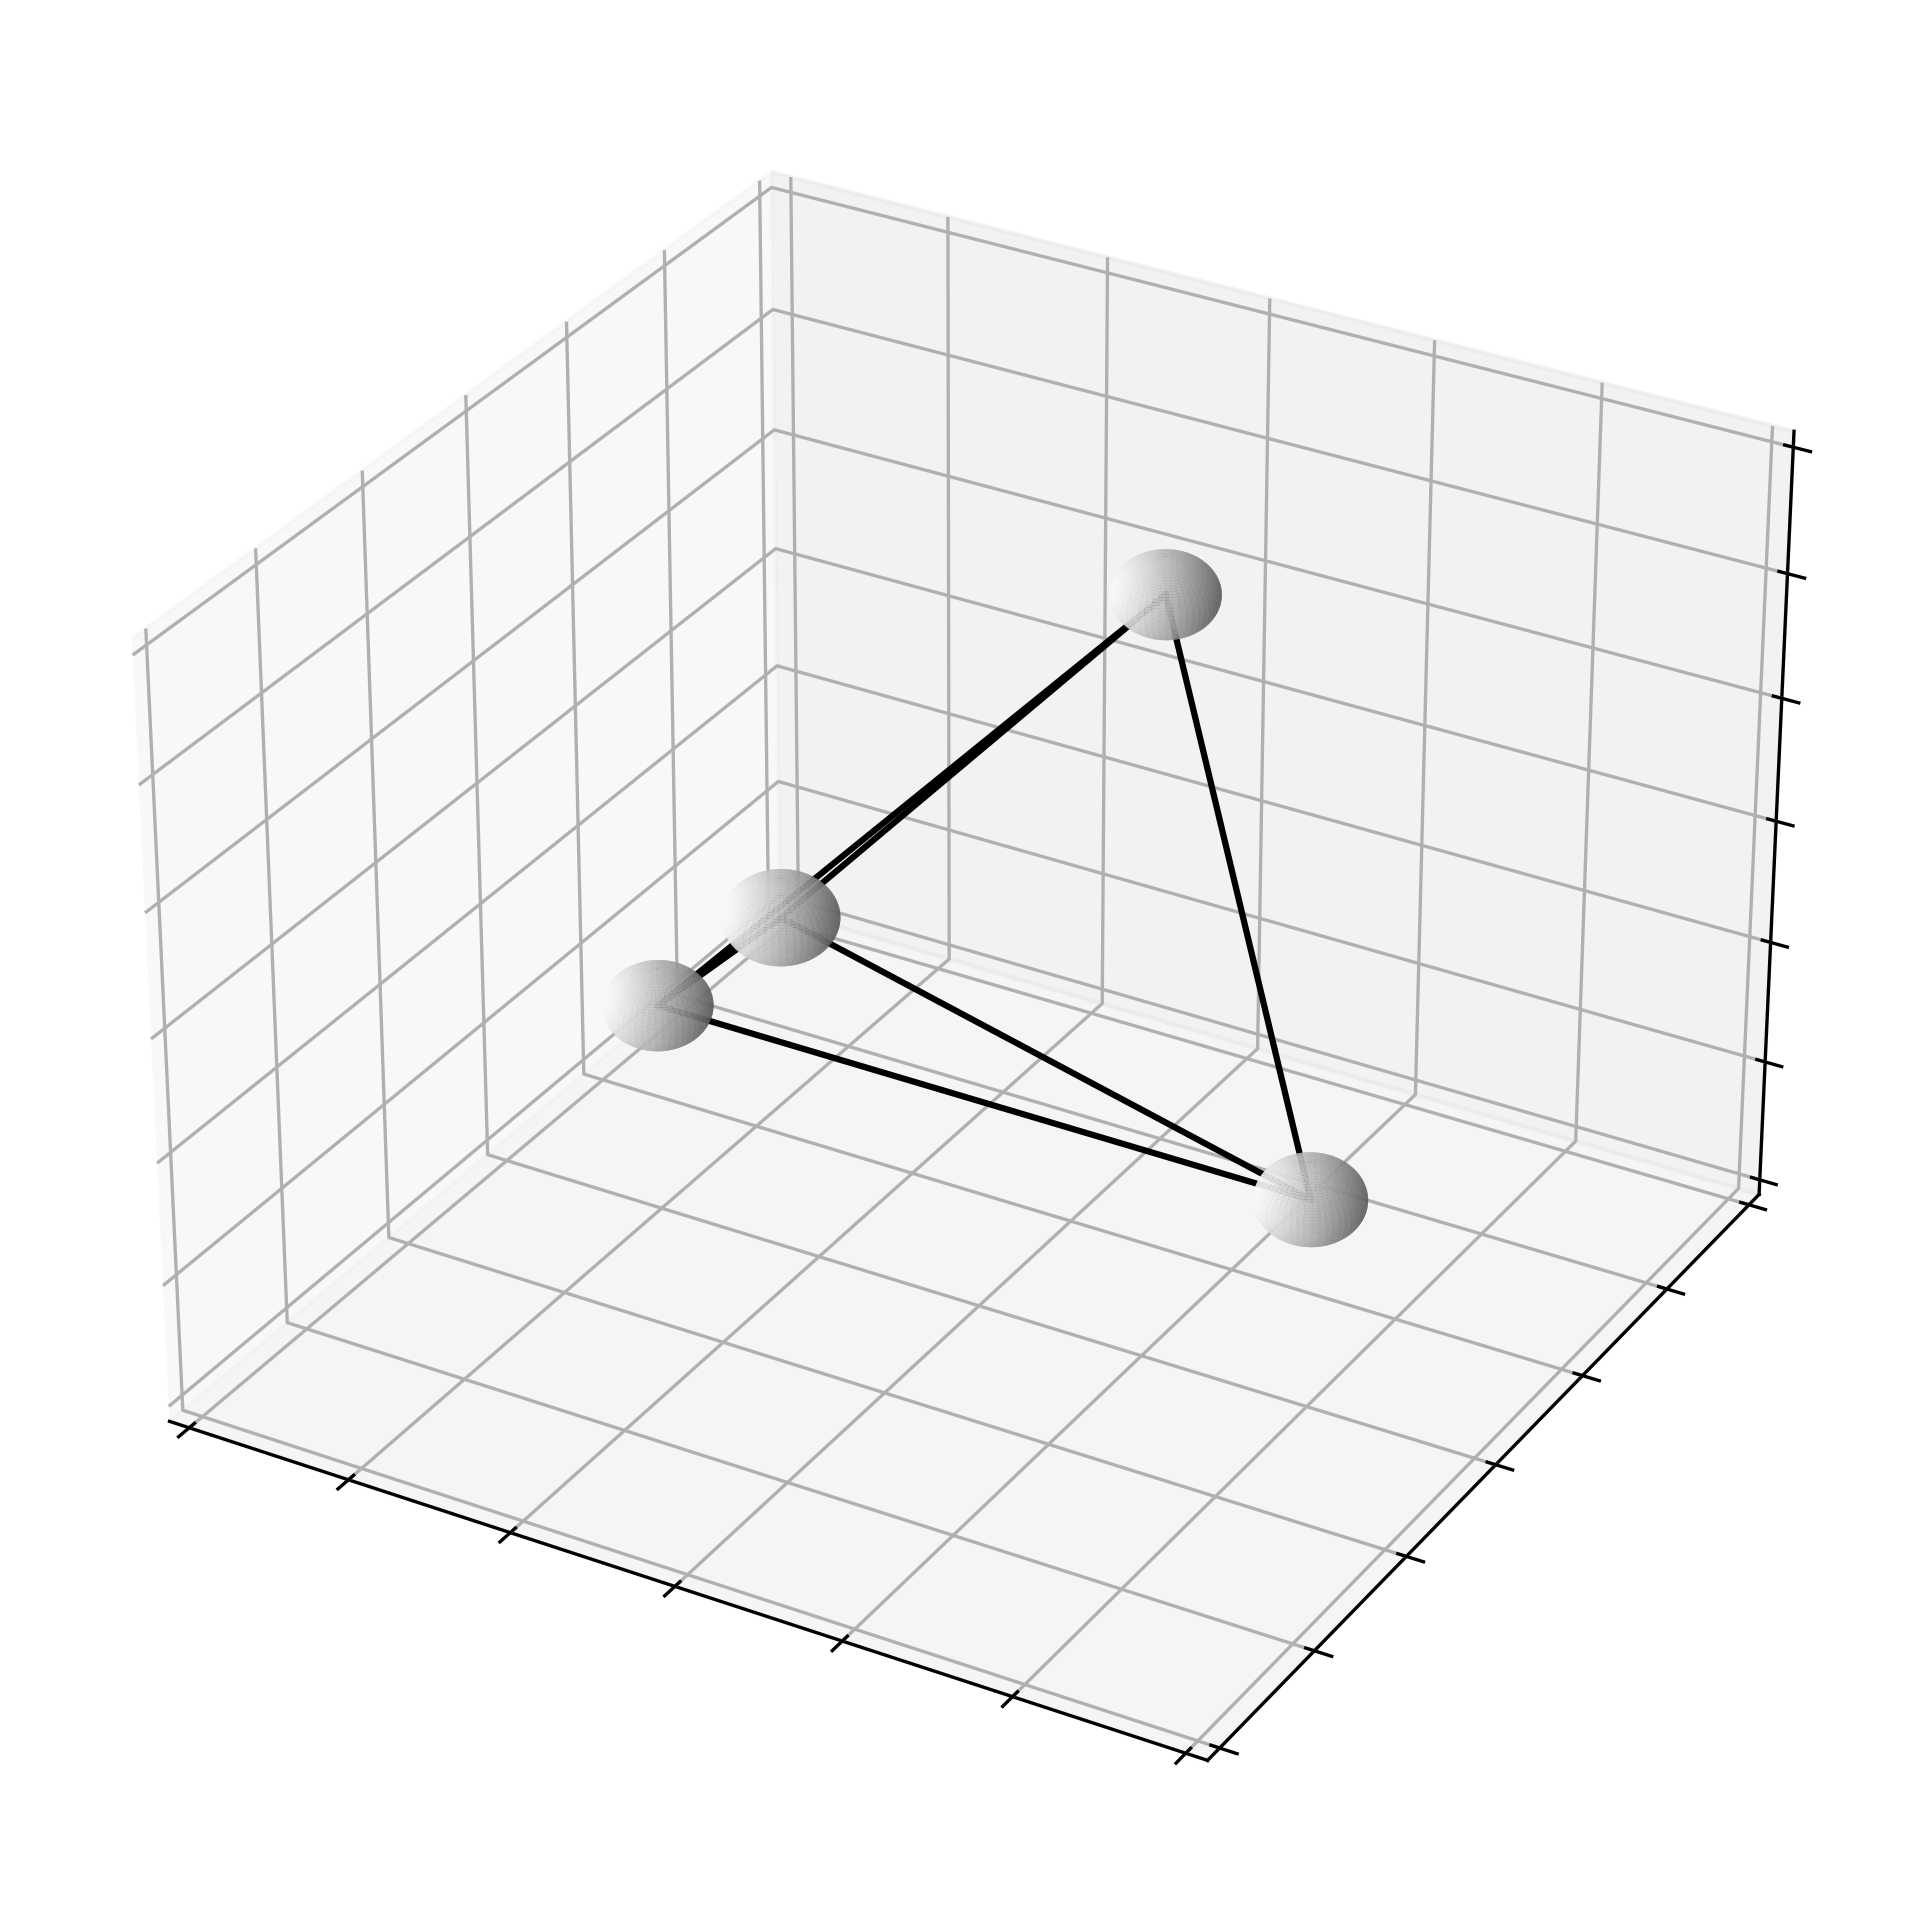

In [12]:
proj_operator = point_proj_operator("A_1", tet_classes, tet_char_table, tet_l, tetrahedral_vertices)
proj_basis = proj_operator @ np.eye(4)
tetrahedral_basis = gram_schmidt(np.hsplit(proj_basis, 4))
s_orbital_plot(tetrahedral_basis, tetrahedral_vertices)

Tetrahedral S-orbital SALCs with $T_2$ symmetry 

S1     S2     S3    S4
SALC 1 -0.707  0.707  0.000 -0.00
SALC 2  0.500  0.500 -0.500 -0.50
SALC 3 -0.199 -0.199  0.848 -0.45

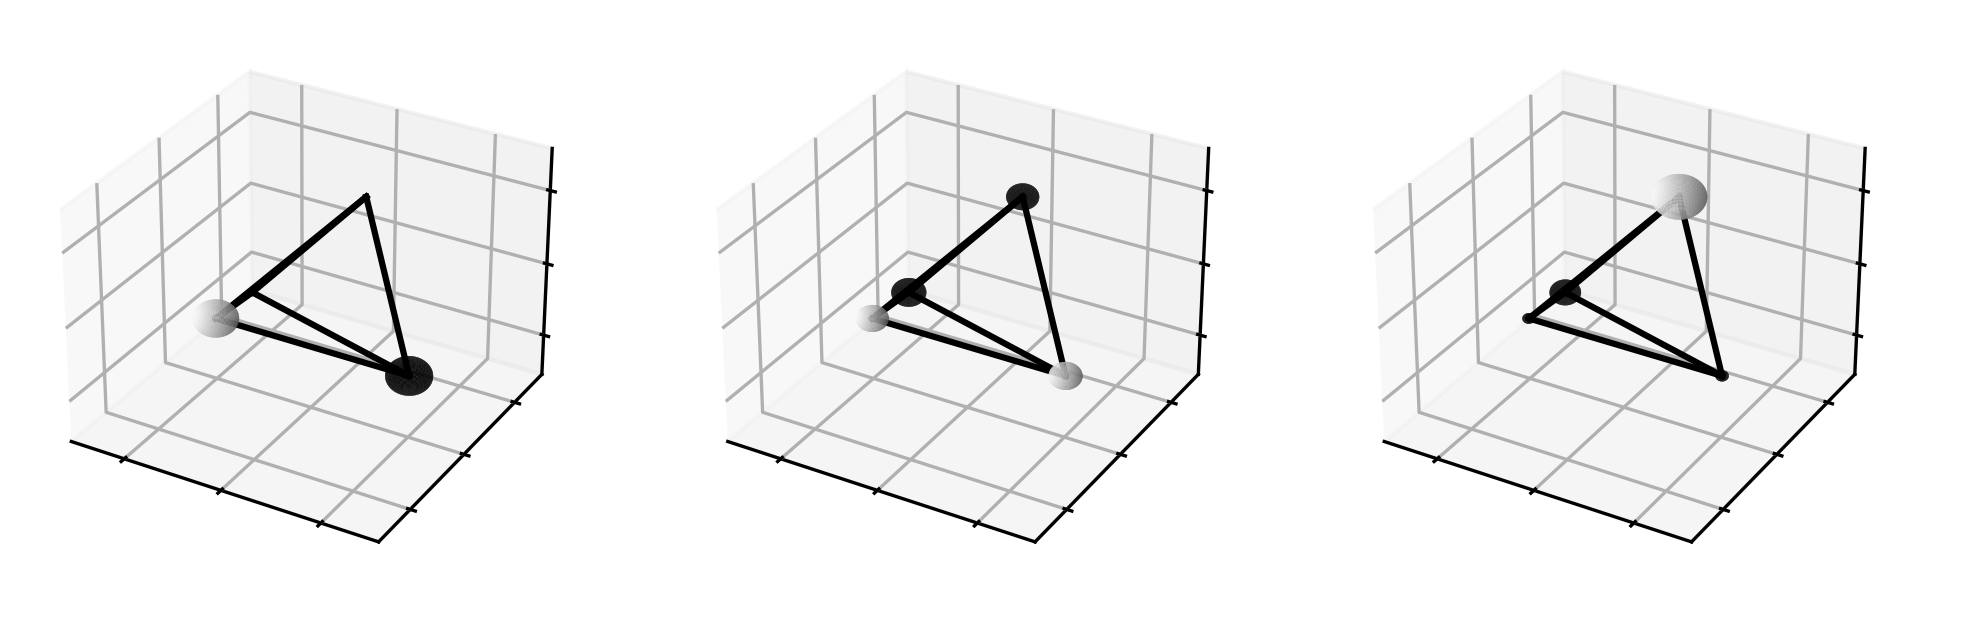

In [95]:
proj_operator = point_proj_operator("T_2", tet_classes, tet_char_table, tet_l, tetrahedral_vertices)
proj_basis = proj_operator @ np.eye(4)
orthonormal_basis = gram_schmidt(np.hsplit(proj_basis, 4))

#Find an aesthetically pleasing linear combination of the subspace vectors
tet_elements = []
for cls in tet_classes:
    for el in cls:
        tet_elements.append(el)

# 17**, 
n = len(orthonormal_basis)
mat = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        mat[i,j] = np.dot(orthonormal_basis[i], np.dot(point_representation(tet_elements[17], tetrahedral_vertices), orthonormal_basis[j]))

eigvals, eigvecs = np.linalg.eig(mat)
test_basis = []
for i in range(n):
    v = np.zeros(4)
    for j in range(n):
        v += orthonormal_basis[j]*eigvecs[j,i]
    test_basis.append(v)

s_orbital_plot(test_basis, tetrahedral_vertices)

<h3>P-orbital Representations</h3>

P-orbitals transform as vectors located at each of the vertices.

In [78]:
def vector_representation(element : np.ndarray, vertices : np.ndarray) -> np.ndarray:
    """generate representations of the group elements based on their action on the vectors located at each vertex"""
    _, n = vertices.shape
    v = np.eye(3)
    rep = np.zeros((3*n, 3*n), dtype=np.float64)
    transformed_vertices = element @ vertices
    p = permutation_matrix(vertices, transformed_vertices)
    for i in range(n):
        for j in range(n):
                if p[i,j]:
                    rep[3*i:3*i+3,3*j:3*j+3] = element        
    return rep




def vector_proj_operator(IR_key: str, class_list: list, char_table: dict, IR_dim: list, vertices) -> np.ndarray:
    """generate the projection operator"""
    _, basis_dim = vertices.shape
    proj_operator = np.zeros((3*basis_dim,3*basis_dim), dtype=np.float64)
    h = sum([len(cls) for cls in class_list])
    for i, cls in enumerate(class_list):
        for element in cls:
            proj_operator += char_table[IR_key][i] * vector_representation(element, vertices)
    for i, key in enumerate(char_table.keys()):
        if key == IR_key:
            n = i
    proj_operator *= (IR_dim[n]/h)
    return proj_operator




def p_orbital_plot(salcs: list, vertices: np.ndarray):
    """plot the s-orbital SALC in the octahedral coordination environment"""
    
    #print SALCs in table
    table = dict()
    basis = np.vstack(salcs)
    n = len(salcs)
    m = vertices.shape[1]
    indices = ["SALC {}".format(i+1) for i in range(n)]
    for i in range(m):
        for j in range(3):
            direction_label = ["x", "y", "z"]
            table["P{}{}".format(direction_label[j] ,i+1)]  = np.around(basis[:,3*i+j],3) 
    display(pd.DataFrame(table, index=indices))

    #iterate over each SALC
    scale_factor = 0.3
    fig, ax = plt.subplots(1,n, figsize=(8,8*n), dpi=300, squeeze=False, subplot_kw={'projection': '3d'})
    for i, salc in enumerate(salcs):

        #draw the edges of the polyhedron
        d_matrix = np.zeros((m,m), dtype=np.float64)
        for k in range(m):
            for l in range(k+1,m):
                diff = vertices[:,k] - vertices[:,l]
                d_matrix[k,l] = np.sqrt(np.dot(diff, diff))
        d_matrix = np.around(d_matrix,3)
        min_dist = np.sort(np.unique(d_matrix))[1]
        connected = (d_matrix == min_dist)
        for k in range(m):
            for l in range(k+1,m):
                if connected[k,l]:
                    ax[0,i].plot([vertices[0,k],vertices[0,l]],
                                 [vertices[1,k],vertices[1,l]],
                                 [vertices[2,k],vertices[2,l]], 
                                 color="black")
        #draw orbitals
        for j in range(m):
            salc = np.around(salc,3)
            vec = salc[3*j:3*j+3]
            magnitude = np.sqrt(np.dot(vec, vec))
            if magnitude > 0.01:
                norm_vec = 0.3 * scale_factor * vec / magnitude
                u, v = np.mgrid[0:2*np.pi:100j, 0:np.pi:100j]
                #positive lobe
                x = scale_factor*magnitude*np.cos(u)*np.sin(v)+vertices[0,j]+norm_vec[0]
                y = scale_factor*magnitude*np.sin(u)*np.sin(v)+vertices[1,j]+norm_vec[1]
                z = scale_factor*magnitude*np.cos(v)+vertices[2,j]+norm_vec[2]
                ax[0,i].plot_surface(x, y, z, color="white", alpha=0.8)        
                #negative lobe
                x = scale_factor*magnitude*np.cos(u)*np.sin(v)+vertices[0,j]-norm_vec[0]
                y = scale_factor*magnitude*np.sin(u)*np.sin(v)+vertices[1,j]-norm_vec[1]
                z = scale_factor*magnitude*np.cos(v)+vertices[2,j]-norm_vec[2]
                ax[0,i].plot_surface(x, y, z, color="black", alpha=0.8)      
                   
        ax[0,i].set_xlim3d(-1.5, 1.5)
        ax[0,i].set_ylim3d(-1.5, 1.5)
        ax[0,i].set_zlim3d(-1.5, 1.5)
        ax[0,i].xaxis.set_major_formatter(plt.NullFormatter())
        ax[0,i].yaxis.set_major_formatter(plt.NullFormatter())
        ax[0,i].zaxis.set_major_formatter(plt.NullFormatter())
   
    plt.show()
    plt.close()


<h5>Octahedral P-orbital SALCs</h5>

In [15]:
#calculate the degeneracy of the SALCs in each irreducible group
for IR_key, IR_chars in oct_char_table.items():

    rep_chars = []
    for cls in oct_classes:
        rep = vector_representation(cls[0], octahedral_vertices)
        rep_chars.append(np.trace(rep))

    rep_chars = np.array(rep_chars)
    row = np.multiply(oct_class_size, IR_chars)
    num = int(np.around((1/oct_order)*np.dot(row, rep_chars), 3))
    print("{n} SALC(s) with {sym} symmetry".format(n=num, sym=IR_key))

1 SALC(s) with A_plus_1 symmetry
0 SALC(s) with A_plus_2 symmetry
1 SALC(s) with E_plus symmetry
2 SALC(s) with T_minus_1 symmetry
1 SALC(s) with T_minus_2 symmetry
0 SALC(s) with A_minus_1 symmetry
0 SALC(s) with A_minus_2 symmetry
0 SALC(s) with E_minus symmetry
1 SALC(s) with T_plus_1 symmetry
1 SALC(s) with T_plus_2 symmetry


Octahedral P-orbital SALCs with $A_1^{+}$ symmetry

Px1  Py1  Pz1  Px2    Py2  Pz2    Px3  Py3  Pz3  Px4    Py4  Pz4  \
SALC 1  0.408 -0.0  0.0  0.0  0.408  0.0 -0.408  0.0 -0.0  0.0 -0.408  0.0   

        Px5  Py5    Pz5  Px6  Py6    Pz6  
SALC 1  0.0  0.0  0.408  0.0  0.0 -0.408

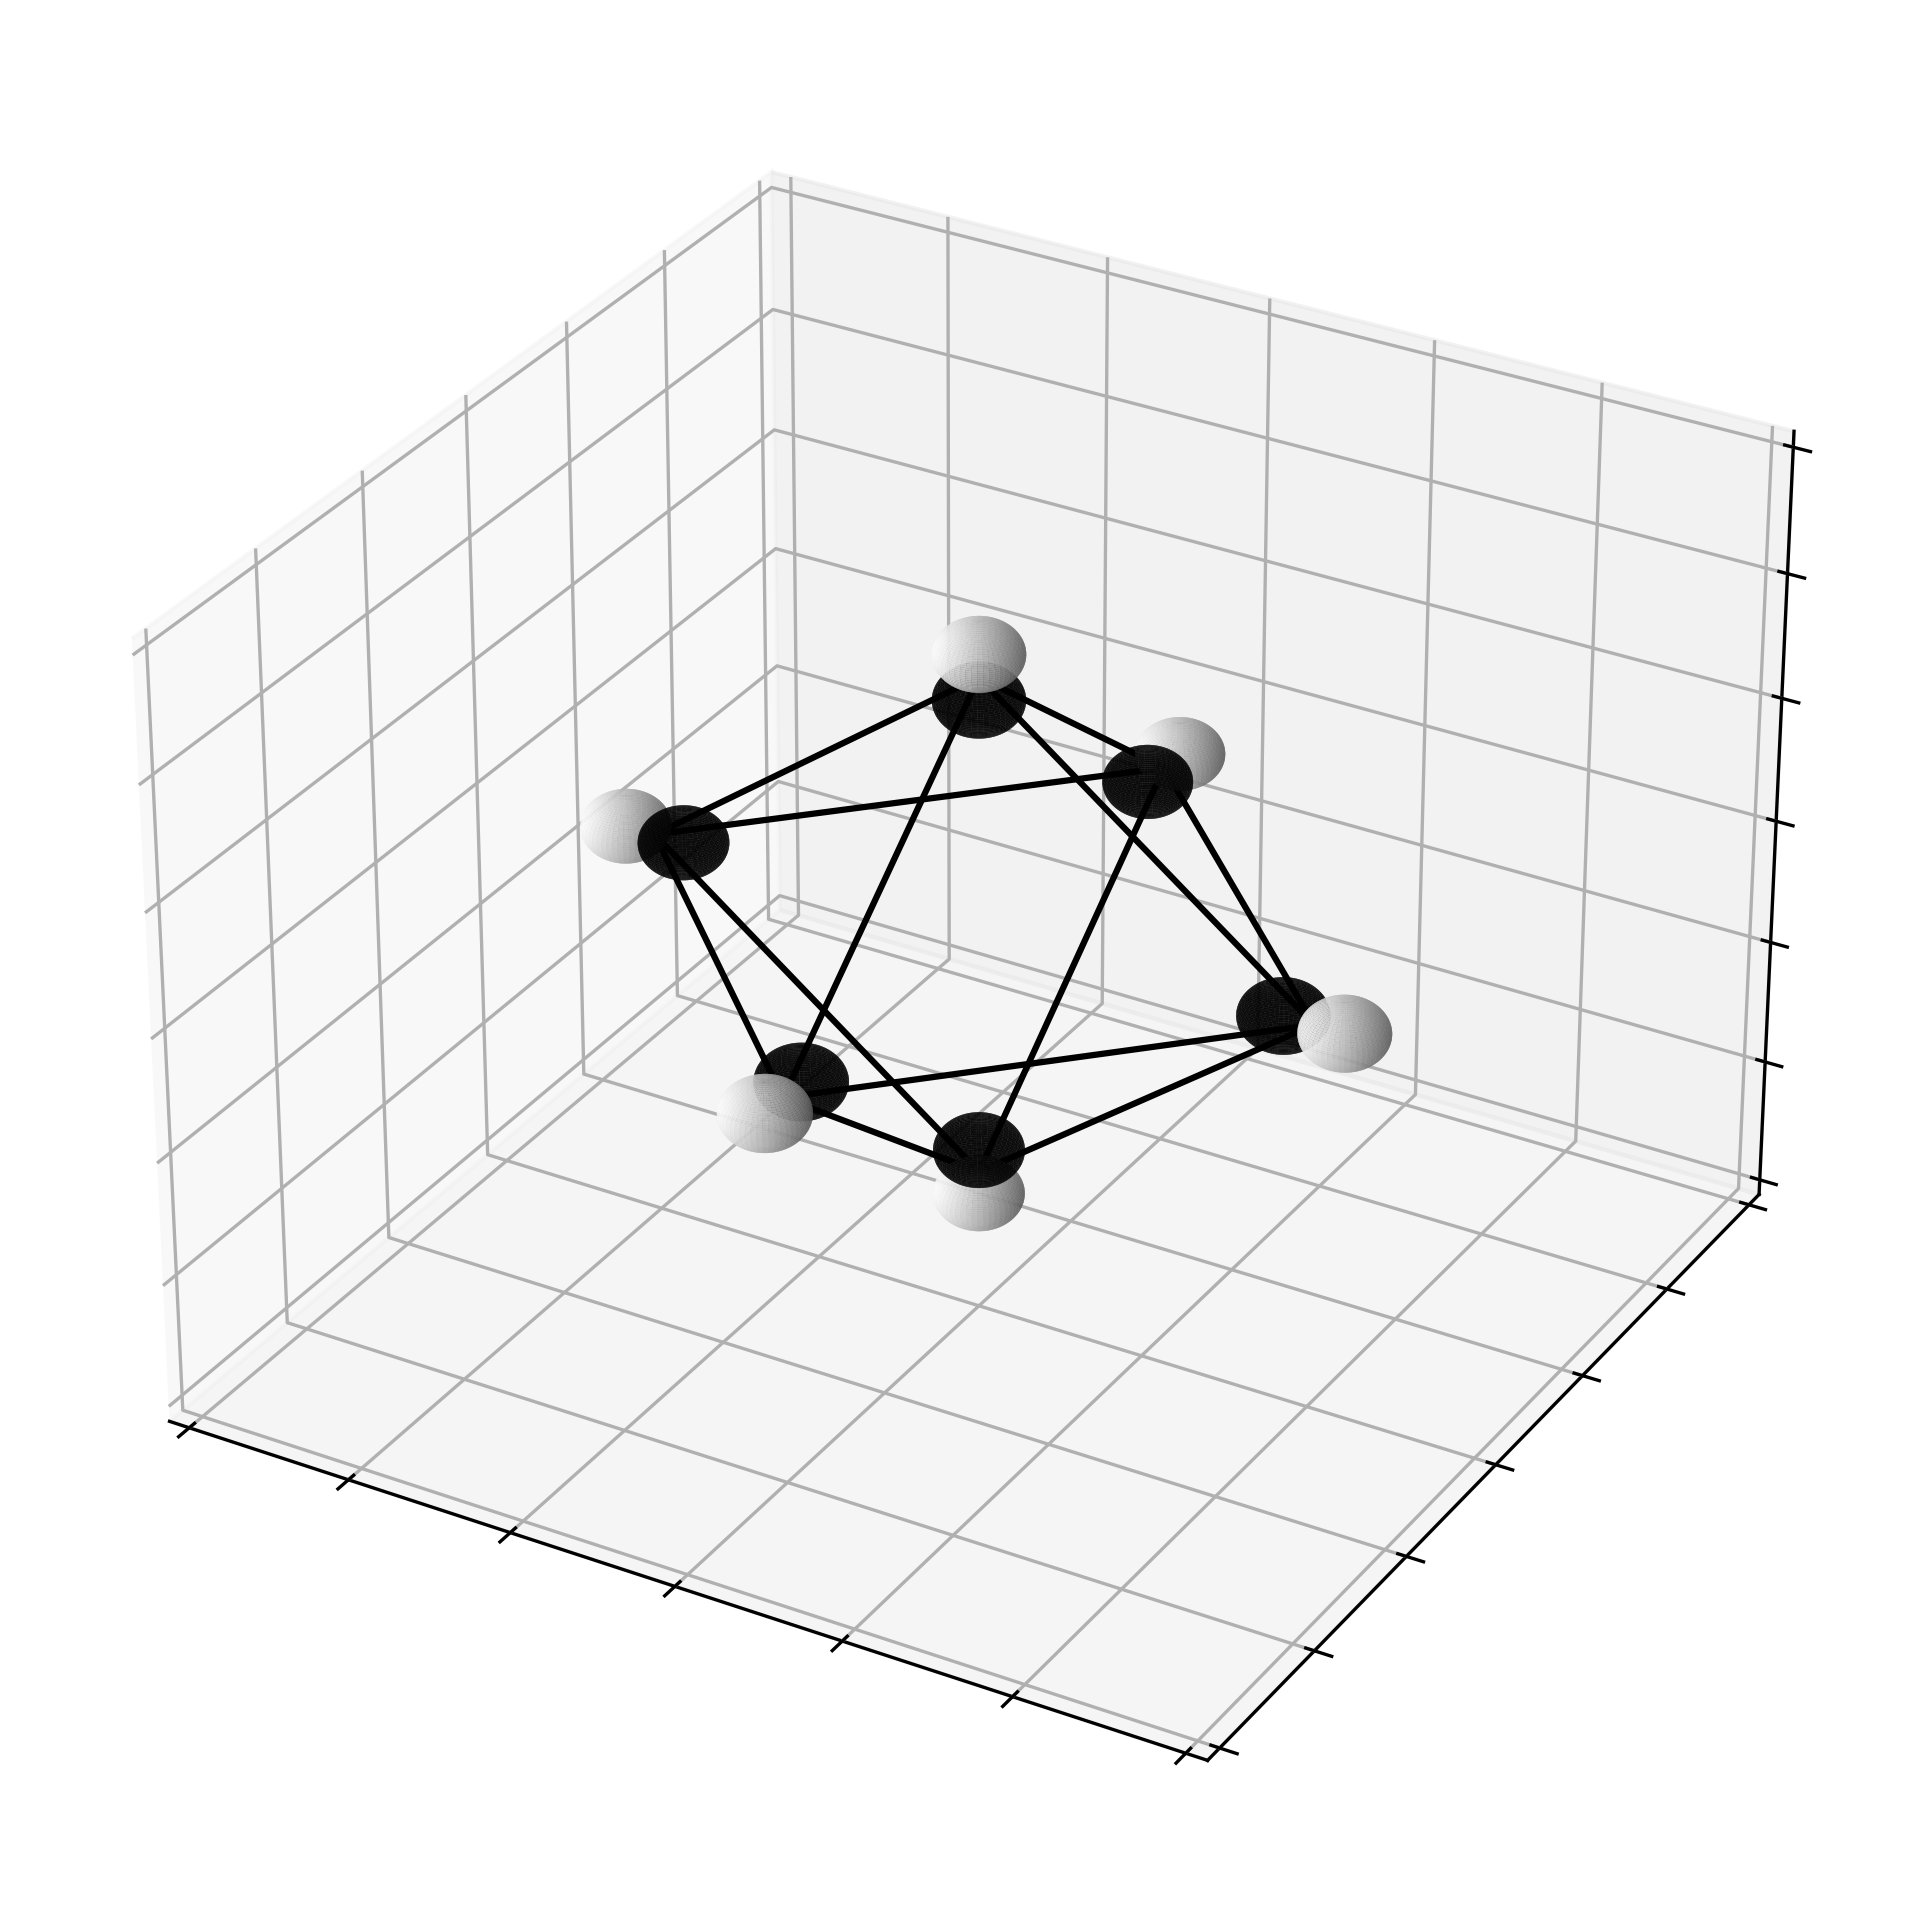

In [16]:
proj_operator = vector_proj_operator("A_plus_1", oct_classes, oct_char_table, oct_l, octahedral_vertices)
proj_basis = proj_operator @ np.eye(18)
octahedral_basis = gram_schmidt(np.hsplit(proj_basis, 18))
p_orbital_plot(octahedral_basis, octahedral_vertices)

Octahedral P-orbital SALCs with $E^{+}$ symmetry 

Px1  Py1  Pz1  Px2    Py2  Pz2    Px3  Py3  Pz3  Px4    Py4  Pz4  \
SALC 1  0.577 -0.0  0.0  0.0 -0.289  0.0 -0.577  0.0 -0.0  0.0  0.289  0.0   
SALC 2 -0.000 -0.0  0.0  0.0  0.500 -0.0  0.000  0.0 -0.0 -0.0 -0.500  0.0   

        Px5  Py5    Pz5  Px6  Py6    Pz6  
SALC 1  0.0  0.0 -0.289  0.0  0.0  0.289  
SALC 2  0.0  0.0 -0.500  0.0  0.0  0.500

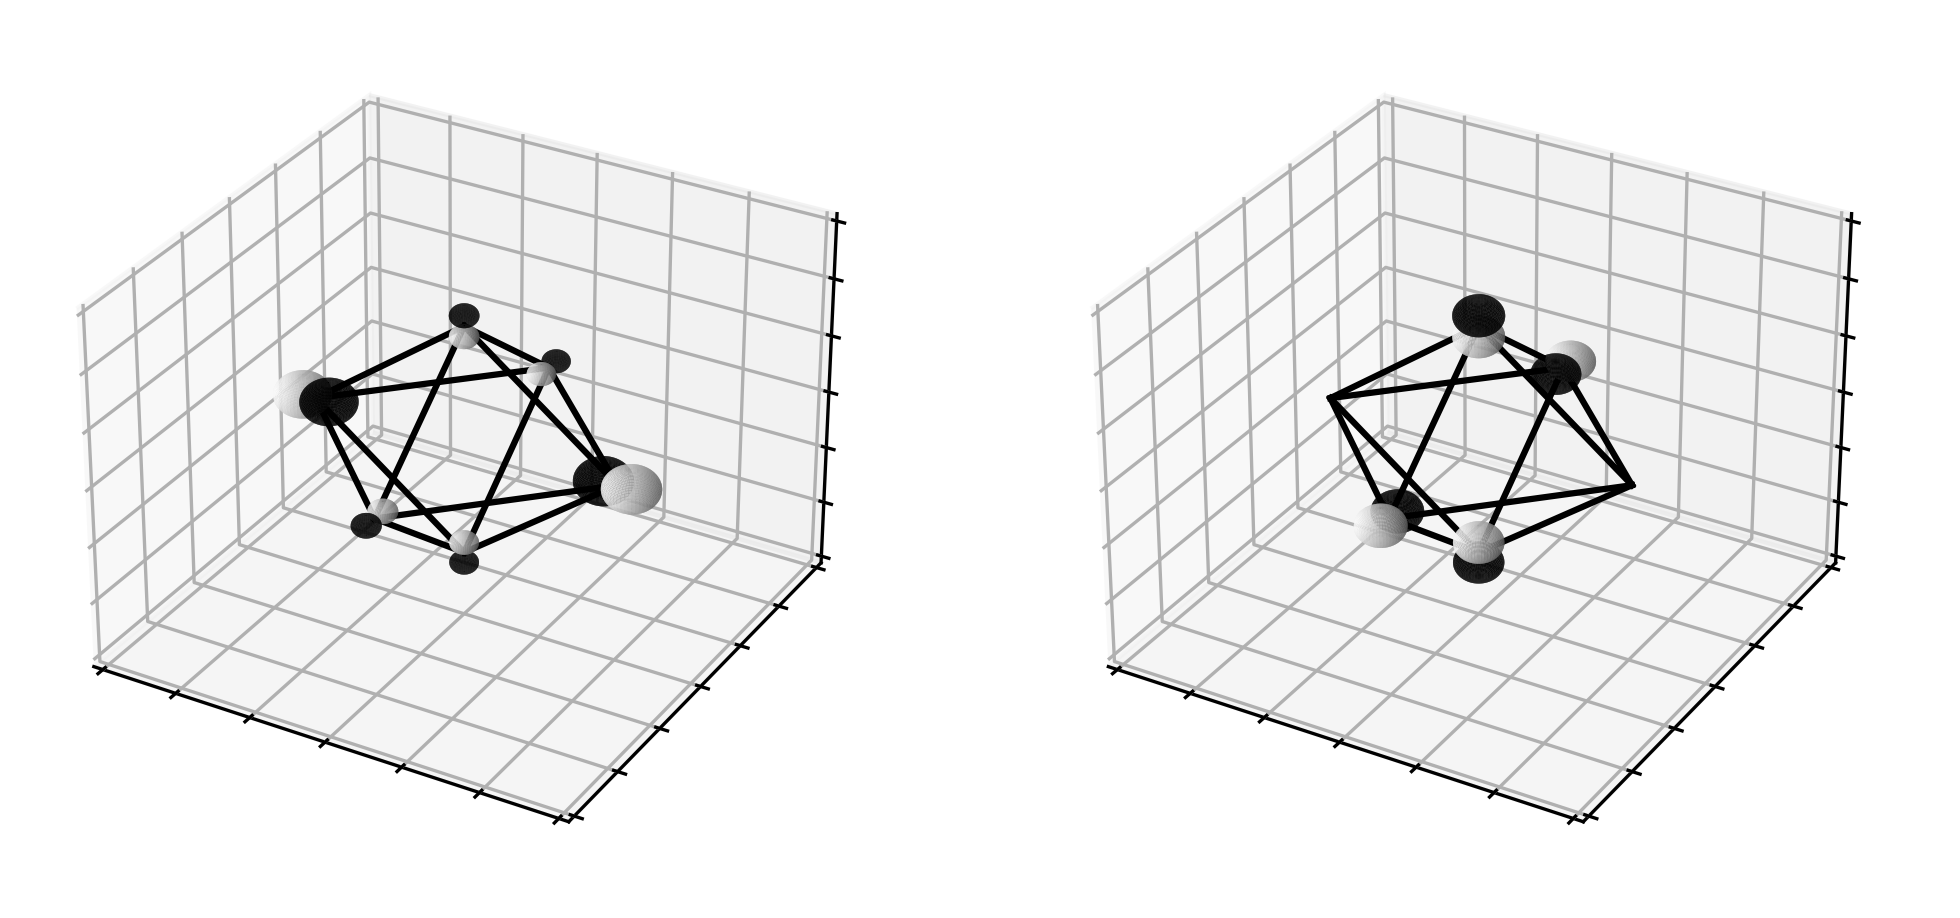

In [17]:
proj_operator = vector_proj_operator("E_plus", oct_classes, oct_char_table, oct_l, octahedral_vertices)
proj_basis = proj_operator @ np.eye(18)
octahedral_basis = gram_schmidt(np.hsplit(proj_basis, 18))
p_orbital_plot(octahedral_basis, octahedral_vertices)

Octahedral P-orbital SALCs with $T_1^{-}$ symmetry 

Px1  Py1  Pz1  Px2    Py2  Pz2    Px3  Py3  Pz3  Px4    Py4  Pz4  \
SALC 1  0.707 -0.0  0.0  0.0  0.000  0.0  0.707 -0.0  0.0  0.0  0.000  0.0   
SALC 2 -0.000 -0.0  0.0  0.0  0.707 -0.0 -0.000 -0.0  0.0  0.0  0.707 -0.0   
SALC 3  0.000 -0.0 -0.0  0.0 -0.000 -0.0  0.000 -0.0 -0.0  0.0 -0.000 -0.0   

        Px5  Py5    Pz5  Px6  Py6    Pz6  
SALC 1  0.0 -0.0  0.000  0.0 -0.0  0.000  
SALC 2  0.0 -0.0  0.000  0.0 -0.0  0.000  
SALC 3 -0.0  0.0  0.707 -0.0  0.0  0.707

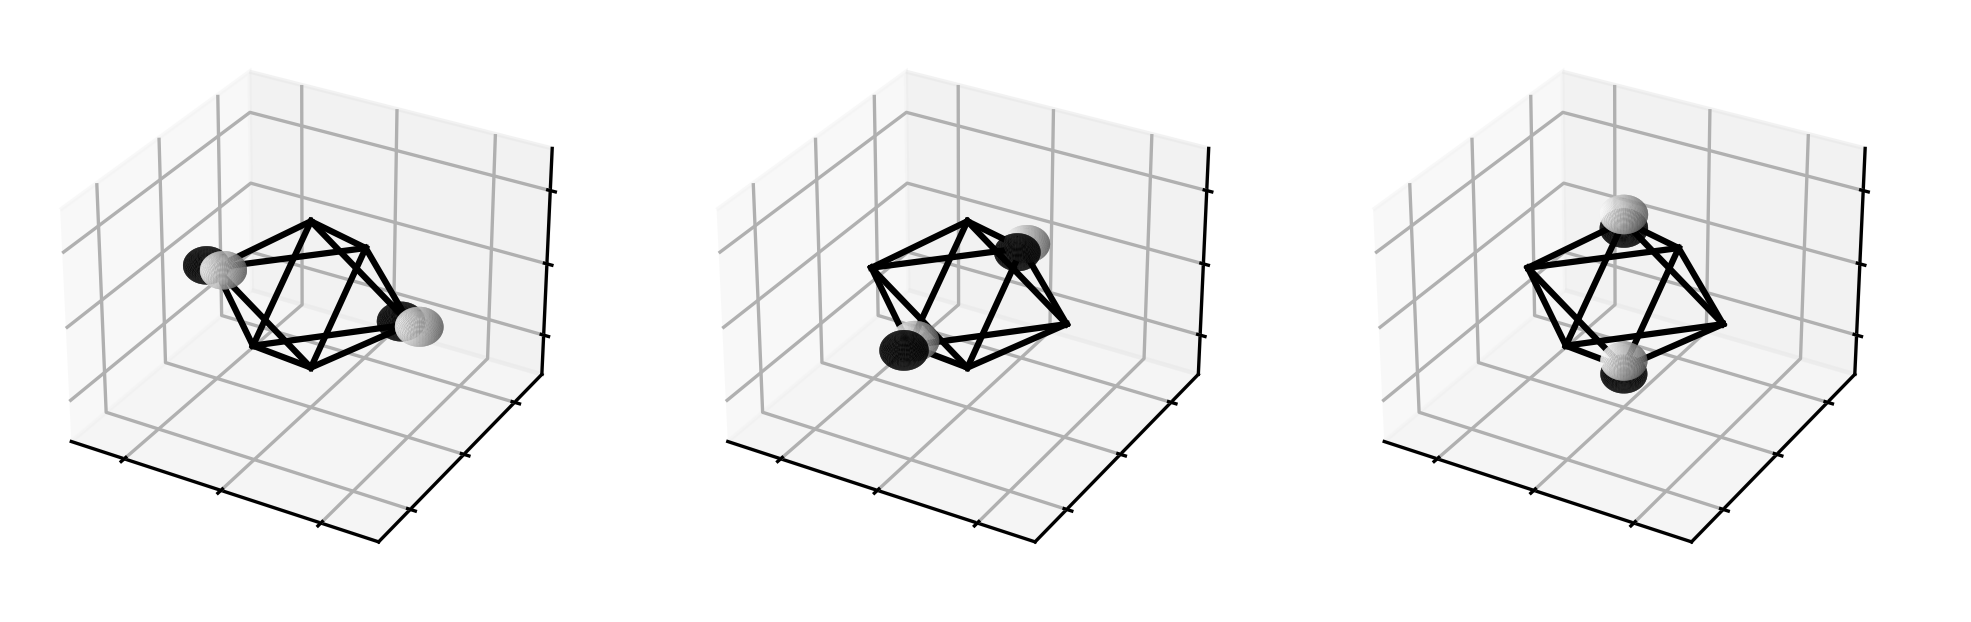

Px1  Py1  Pz1  Px2  Py2  Pz2  Px3  Py3  Pz3  Px4  Py4  Pz4  Px5  Py5  \
SALC 1  0.0  0.5 -0.0 -0.0  0.0 -0.0  0.0  0.5 -0.0 -0.0  0.0 -0.0  0.0  0.5   
SALC 2 -0.0  0.0  0.5 -0.0  0.0  0.5 -0.0  0.0  0.5 -0.0  0.0  0.5 -0.0  0.0   
SALC 3 -0.0  0.0  0.0  0.5 -0.0  0.0 -0.0  0.0  0.0  0.5 -0.0  0.0  0.5 -0.0   

        Pz5  Px6  Py6  Pz6  
SALC 1  0.0  0.0  0.5  0.0  
SALC 2  0.0 -0.0  0.0  0.0  
SALC 3 -0.0  0.5 -0.0 -0.0

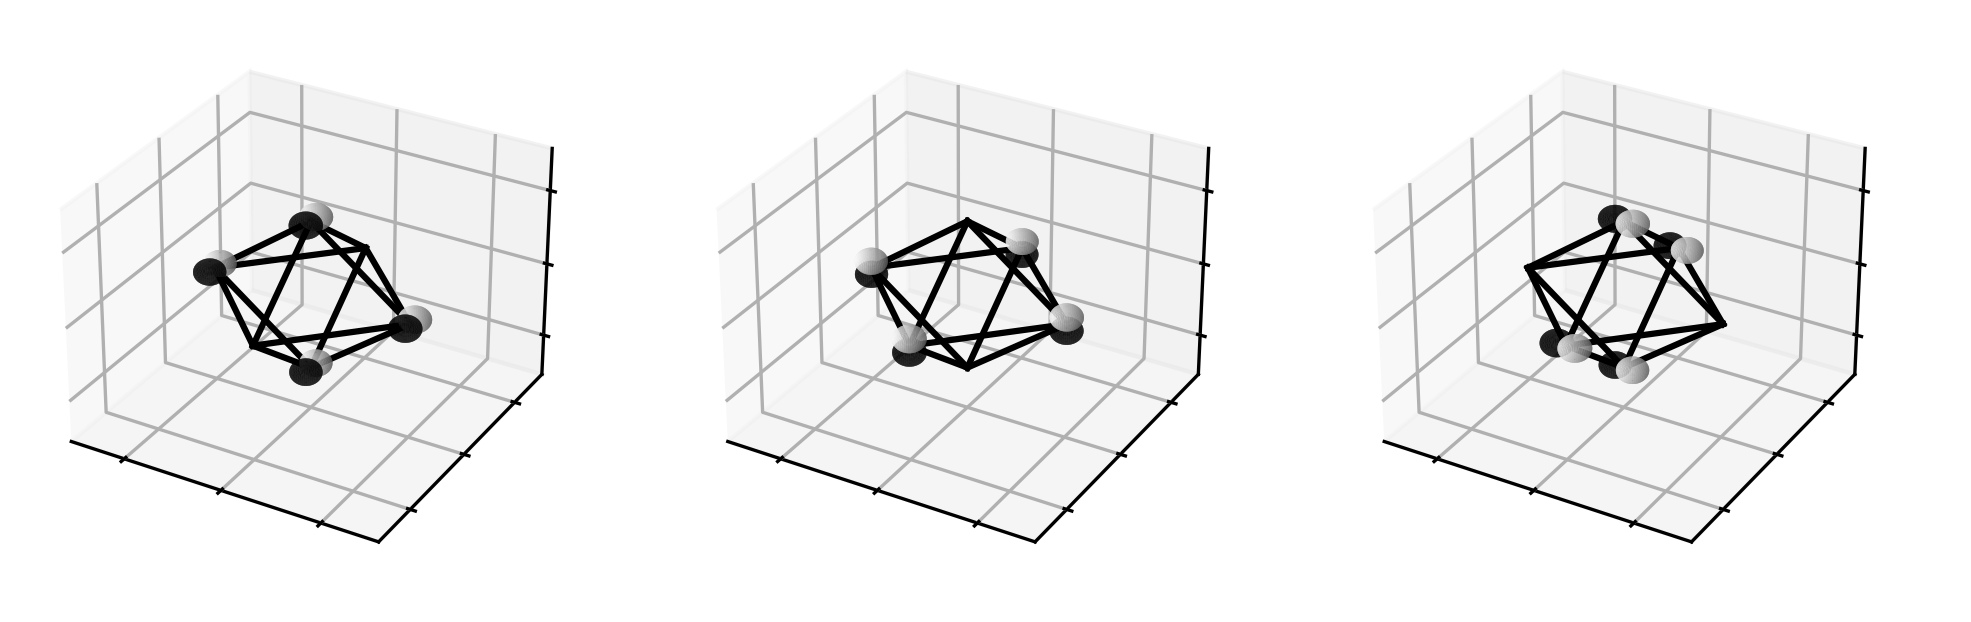

In [18]:
proj_operator = vector_proj_operator("T_minus_1", oct_classes, oct_char_table, oct_l, octahedral_vertices)
proj_basis = proj_operator @ np.eye(18)
orthonormal_basis = gram_schmidt(np.hsplit(proj_basis, 18))

#split the basis into the two invariant subspaces
g1 = [orthonormal_basis[i] for i in [0,4,5] ]
p_orbital_plot(g1, octahedral_vertices)
g2 = [orthonormal_basis[i] for i in [1,2,3] ]
p_orbital_plot(g2, octahedral_vertices)

Octahedral P-orbital SALCs with $T_2^{-}$ symmetry

Px1  Py1  Pz1  Px2  Py2  Pz2  Px3  Py3  Pz3  Px4  Py4  Pz4  Px5  Py5  \
SALC 1 -0.0  0.5 -0.0  0.0 -0.0  0.0 -0.0  0.5 -0.0  0.0 -0.0  0.0 -0.0 -0.5   
SALC 2 -0.0  0.0  0.5  0.0  0.0 -0.5 -0.0  0.0  0.5  0.0  0.0 -0.5  0.0  0.0   
SALC 3 -0.0  0.0 -0.0  0.5  0.0  0.0 -0.0  0.0 -0.0  0.5  0.0  0.0 -0.5  0.0   

        Pz5  Px6  Py6  Pz6  
SALC 1  0.0 -0.0 -0.5  0.0  
SALC 2 -0.0  0.0  0.0 -0.0  
SALC 3 -0.0 -0.5  0.0 -0.0

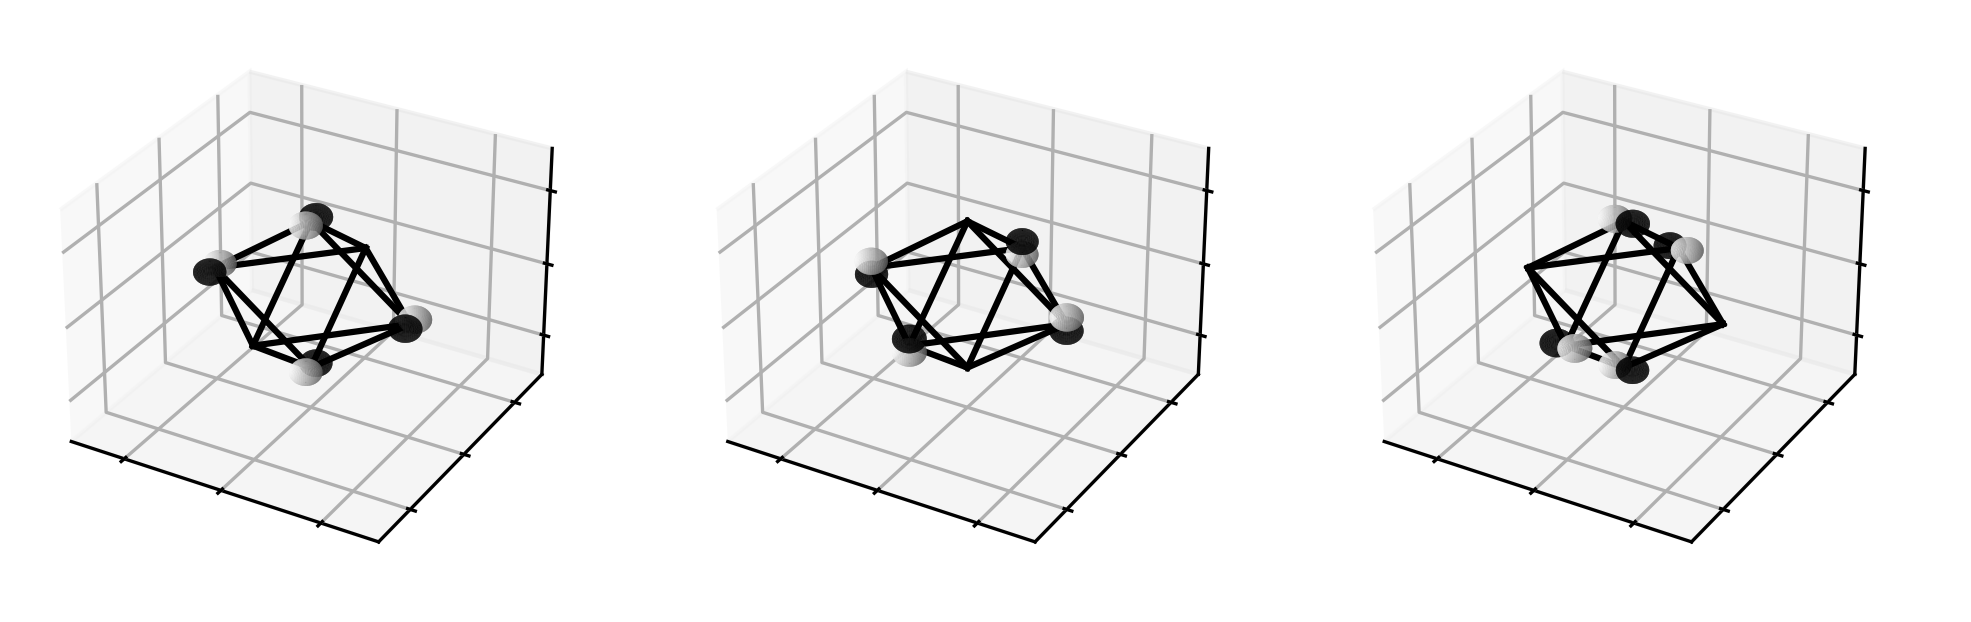

In [19]:
proj_operator = vector_proj_operator("T_minus_2", oct_classes, oct_char_table, oct_l, octahedral_vertices)
proj_basis = proj_operator @ np.eye(18)
orthonormal_basis = gram_schmidt(np.hsplit(proj_basis, 18))
p_orbital_plot(orthonormal_basis, octahedral_vertices)

<h5>Tetrahedral P-orbital SALCs</h5>

In [20]:
#calculate the degeneracy of the SALCs in each irreducible group
for IR_key, IR_chars in tet_char_table.items():

    rep_chars = []
    for cls in tet_classes:
        rep = vector_representation(cls[0], tetrahedral_vertices)
        rep_chars.append(np.trace(rep))

    rep_chars = np.array(rep_chars)
    row = np.multiply(tet_class_size, IR_chars)
    num = int(np.around((1/tet_order)*np.dot(row, rep_chars), 3))
    print("{n} SALC(s) with {sym} symmetry".format(n=num, sym=IR_key))

1 SALC(s) with A_1 symmetry
0 SALC(s) with A_2 symmetry
1 SALC(s) with E symmetry
1 SALC(s) with T_1 symmetry
2 SALC(s) with T_2 symmetry


Tetrahedral P-orbital SALCs with $A_{1}$ symmetry

In [21]:
proj_operator = vector_proj_operator("A_1", tet_classes, tet_char_table, tet_l, tetrahedral_vertices)
proj_basis = proj_operator @ np.eye(12)
orthonormal_basis = gram_schmidt(np.hsplit(proj_basis, 12))
p_orbital_plot(orthonormal_basis, tetrahedral_vertices)

Px1  Py1    Pz1    Px2  Py2    Pz2  Px3    Py3    Pz3  Px4    Py4  \
SALC 1  0.408 -0.0 -0.289 -0.408  0.0 -0.289  0.0  0.408  0.289 -0.0 -0.408   

          Pz4  
SALC 1  0.289

Tetrahedral P-orbital SALCs with $E$ symmetry

Px1  Py1    Pz1    Px2  Py2    Pz2  Px3    Py3    Pz3  Px4    Py4  \
SALC 1  0.289  0.0  0.408 -0.289  0.0  0.408 -0.0  0.289 -0.408 -0.0 -0.289   
SALC 2 -0.000  0.5 -0.000 -0.000 -0.5  0.000  0.5 -0.000  0.000 -0.5 -0.000   

          Pz4  
SALC 1 -0.408  
SALC 2 -0.000

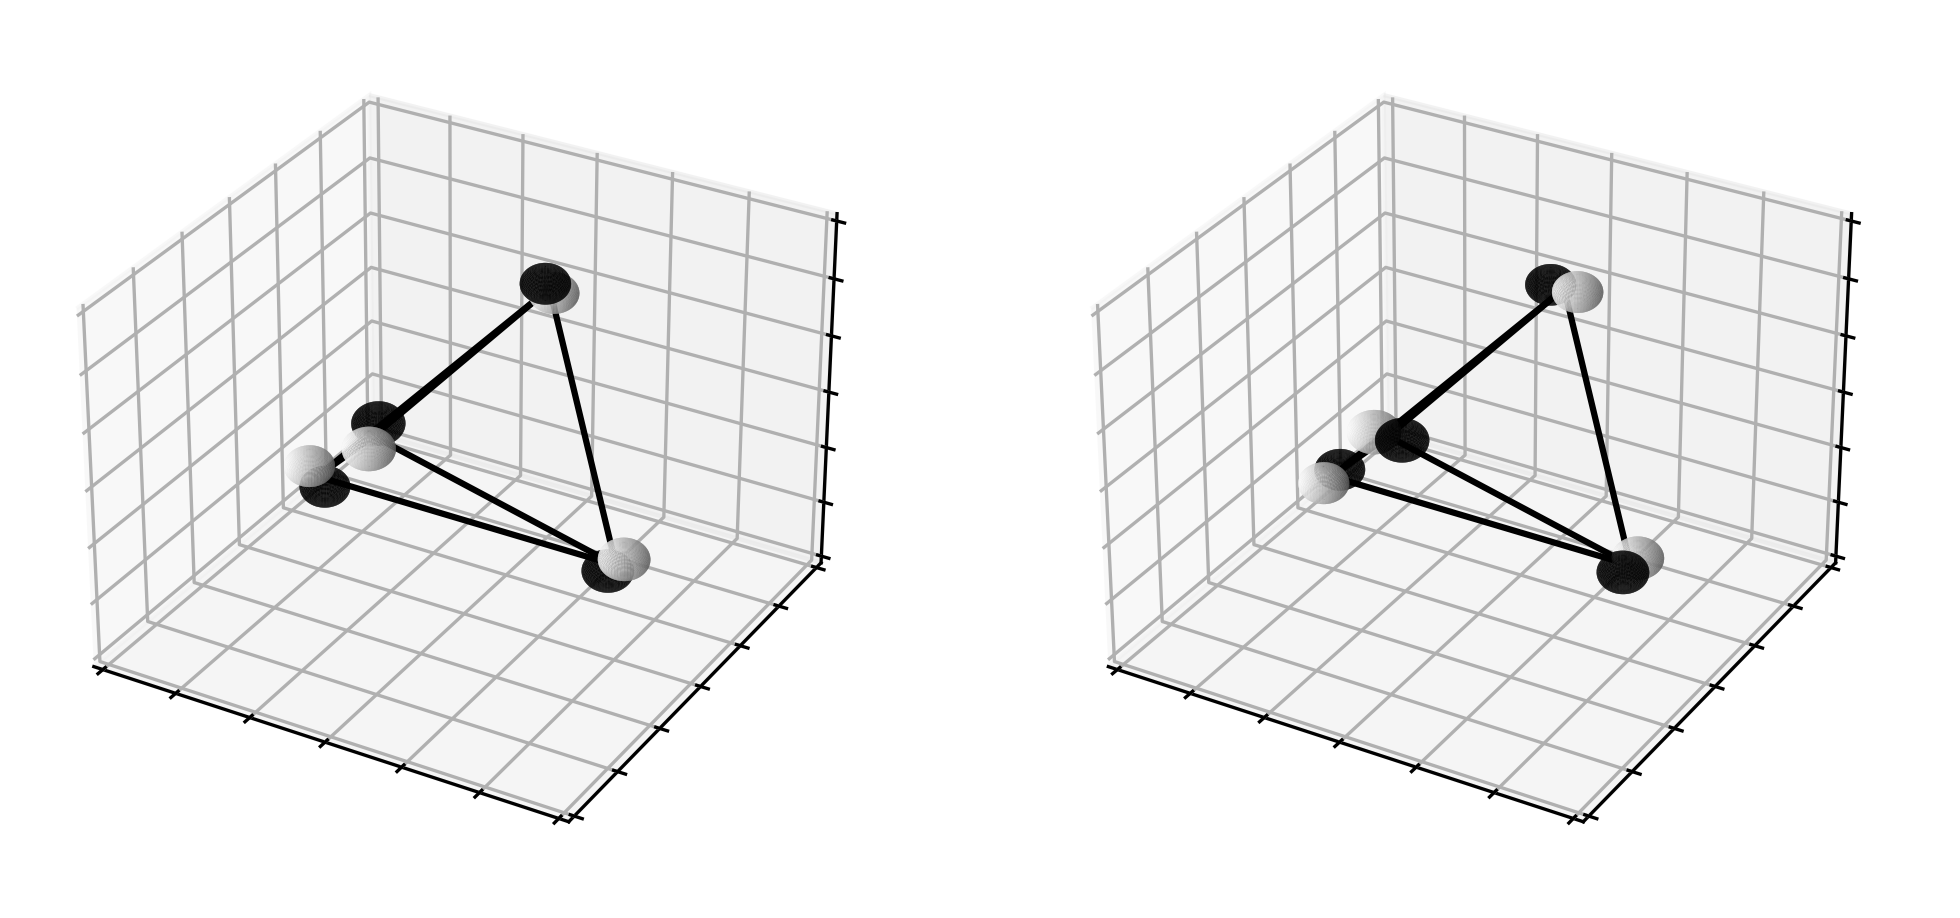

In [22]:
proj_operator = vector_proj_operator("E", tet_classes, tet_char_table, tet_l, tetrahedral_vertices)
proj_basis = proj_operator @ np.eye(12)
orthonormal_basis = gram_schmidt(np.hsplit(proj_basis, 12))
p_orbital_plot(orthonormal_basis, tetrahedral_vertices)

Tetrahedral P-orbital SALCs with $T_{1}$ symmetry

In [93]:
proj_operator = vector_proj_operator("T_1", tet_classes, tet_char_table, tet_l, tetrahedral_vertices)
proj_basis = (proj_operator @ np.eye(12))#[:,np.random.permutation(12)]
orthonormal_basis = gram_schmidt(np.hsplit(proj_basis, 12))

#Find an aesthetically pleasing linear combination of the subspace vectors
tet_elements = []
for cls in tet_classes:
    for el in cls:
        tet_elements.append(el)

#0, 9, 10, 11, 12* 17**, 
n = len(orthonormal_basis)
mat = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        mat[i,j] = np.dot(orthonormal_basis[i], np.dot(vector_representation(tet_elements[17], tetrahedral_vertices), orthonormal_basis[j]))

eigvals, eigvecs = np.linalg.eig(mat)
test_basis = []
for i in range(n):
    v = np.zeros(12)
    for j in range(n):
        v += orthonormal_basis[j]*eigvecs[j,i]
    test_basis.append(v)

p_orbital_plot(test_basis, tetrahedral_vertices)

Px1    Py1    Pz1    Px2    Py2    Pz2    Px3    Py3  Pz3    Px4  \
SALC 1  0.354  0.000  0.500  0.354 -0.000 -0.500 -0.354  0.000 -0.0 -0.354   
SALC 2  0.000  0.354 -0.000  0.000  0.354  0.000 -0.000 -0.354  0.5  0.000   
SALC 3 -0.038  0.497 -0.054 -0.038 -0.497  0.054 -0.459  0.000 -0.0  0.535   

          Py4  Pz4  
SALC 1 -0.000 -0.0  
SALC 2 -0.354 -0.5  
SALC 3 -0.000  0.0

Tetrahedral P-orbital SALCs with $T_{2}$ symmetry. There are two triply degenerate invariant subspaces under the action of the group elements with such symmetry.

Px1   Py1    Pz1    Px2   Py2    Pz2    Px3    Py3    Pz3    Px4  \
SALC 1 -0.500 -0.00  0.000  0.500 -0.00  0.000 -0.000  0.500 -0.000 -0.000   
SALC 2  0.153  0.00  0.476 -0.153  0.00  0.476  0.000 -0.153  0.476  0.000   
SALC 3 -0.525 -0.23  0.243 -0.525 -0.23 -0.243 -0.181  0.127  0.253 -0.181   

          Py4    Pz4  
SALC 1 -0.500 -0.000  
SALC 2  0.153  0.476  
SALC 3  0.127 -0.253

Px1    Py1    Pz1    Px2    Py2    Pz2    Px3    Py3    Pz3    Px4  \
SALC 1  0.347 -0.368 -0.171  0.347 -0.368  0.171  0.106  0.203  0.404  0.106   
SALC 2  0.167  0.355  0.097  0.167  0.355 -0.097  0.305  0.485  0.091  0.305   
SALC 3  0.351  0.322 -0.363  0.351  0.322  0.363 -0.163  0.338  0.012 -0.163   

          Py4    Pz4  
SALC 1  0.203 -0.404  
SALC 2  0.485 -0.091  
SALC 3  0.338 -0.012

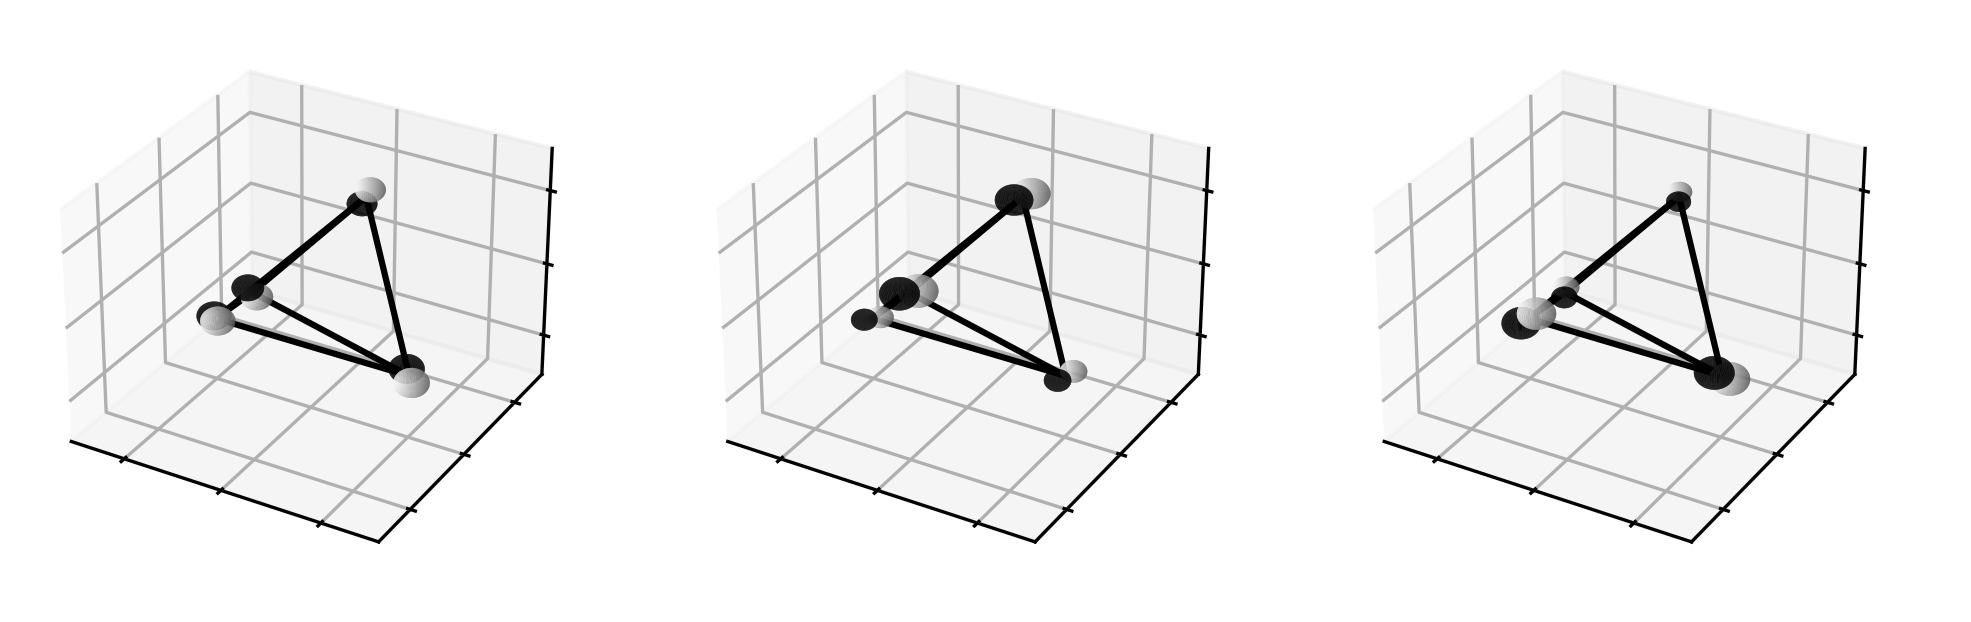

In [122]:
proj_operator = vector_proj_operator("T_2", tet_classes, tet_char_table, tet_l, tetrahedral_vertices)
proj_basis = (proj_operator @ np.eye(12))
orthonormal_basis = gram_schmidt(np.hsplit(proj_basis, 12))


tet_elements = []
for cls in tet_classes:
    for el in cls:
        tet_elements.append(el)


#0, 9, 11, 12
mat = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        mat[i,j] = np.dot(orthonormal_basis[i], np.dot(vector_representation(tet_elements[9], tetrahedral_vertices), orthonormal_basis[j]))
eigvals, eigvecs = np.linalg.eig(mat)
test_basis = []
for i in range(n):
    v = np.zeros(12)
    for j in range(n):
        v += orthonormal_basis[j]*eigvecs[j,i]
    test_basis.append(v)


#split the basis into the two invariant subspaces
g1 = [test_basis[i] for i in [0,1,2] ]
p_orbital_plot(g1, tetrahedral_vertices)
g2 = [test_basis[i] for i in [3,4,5] ]
p_orbital_plot(g2, tetrahedral_vertices)